<a href="https://colab.research.google.com/github/ElenaVillano/visualizacionR/blob/main/notebooks/s3-your-own-graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 2

Por Elena Villalobos

Haz tus propios gráficos

In [78]:
# Para instalar paquetes que no están en Colab
#install.packages("ggsci")
#install.packages('ggridges')
#install.packages('fmsb')

In [79]:
library('tidyverse')
library("ggsci")
library("ggridges")
library('fmsb')

In [185]:
# Indicadores con columnas con nombres diferentes
indicadores <- read_csv('https://raw.githubusercontent.com/ElenaVillano/visualizacionR/main/data/indicadores.csv')

In [13]:
# Indicadores con nombres correctos
#indicadores <- read_csv('https://raw.githubusercontent.com/ElenaVillano/visualizacionR/main/data/eje1_estado_democratico_derecho.csv')

In [15]:
# Tamaño de base de datos
dim(indicadores)

[1] 78  8

In [16]:
# Primeras observaciones
head(indicadores)

pais,año,indic_1,indic_6,indic_2,indic_4,indic_3,indic_5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Chile,2010,10.50,1.16,77.2,69.0,0.742,1.10
Chile,2011,29.00,1.15,77.4,67.0,0.742,1.07
Chile,2012,NA,1.18,78.3,72.0,0.742,1.08
Chile,2013,73.76,1.16,79.0,72.0,0.742,1.11
Chile,2014,74.20,1.04,78.7,72.3,0.783,1.06
Chile,2015,77.00,0.92,78.5,71.0,0.807,1.00


In [21]:
# Línea para que los gráficos se vean más grandes
options(repr.plot.with = 1, repr.plot.height = 5, repr.plot.res=250)

# Prueba diferentes temas

  - theme_gray(): signature ggplot2 theme
  - theme_bw(): dark on light ggplot2 theme
  - theme_linedraw(): uses black lines on white backgrounds only
  - theme_light(): similar to linedraw() but with grey lines as well
  - theme_dark(): lines on a dark background instead of light
  - theme_minimal(): no background annotations, minimal feel
  - theme_classic(): theme with no grid lines
  - theme_void(): empty theme with no elements

## Boxplot

- Ver: ["¿qué es un boxplot?"](https://es.wikipedia.org/wiki/Diagrama_de_caja#/media/Archivo:Diagrama_de_caja.jpg)

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Diagrama_de_caja.jpg/640px-Diagrama_de_caja.jpg" width="700"/>]()



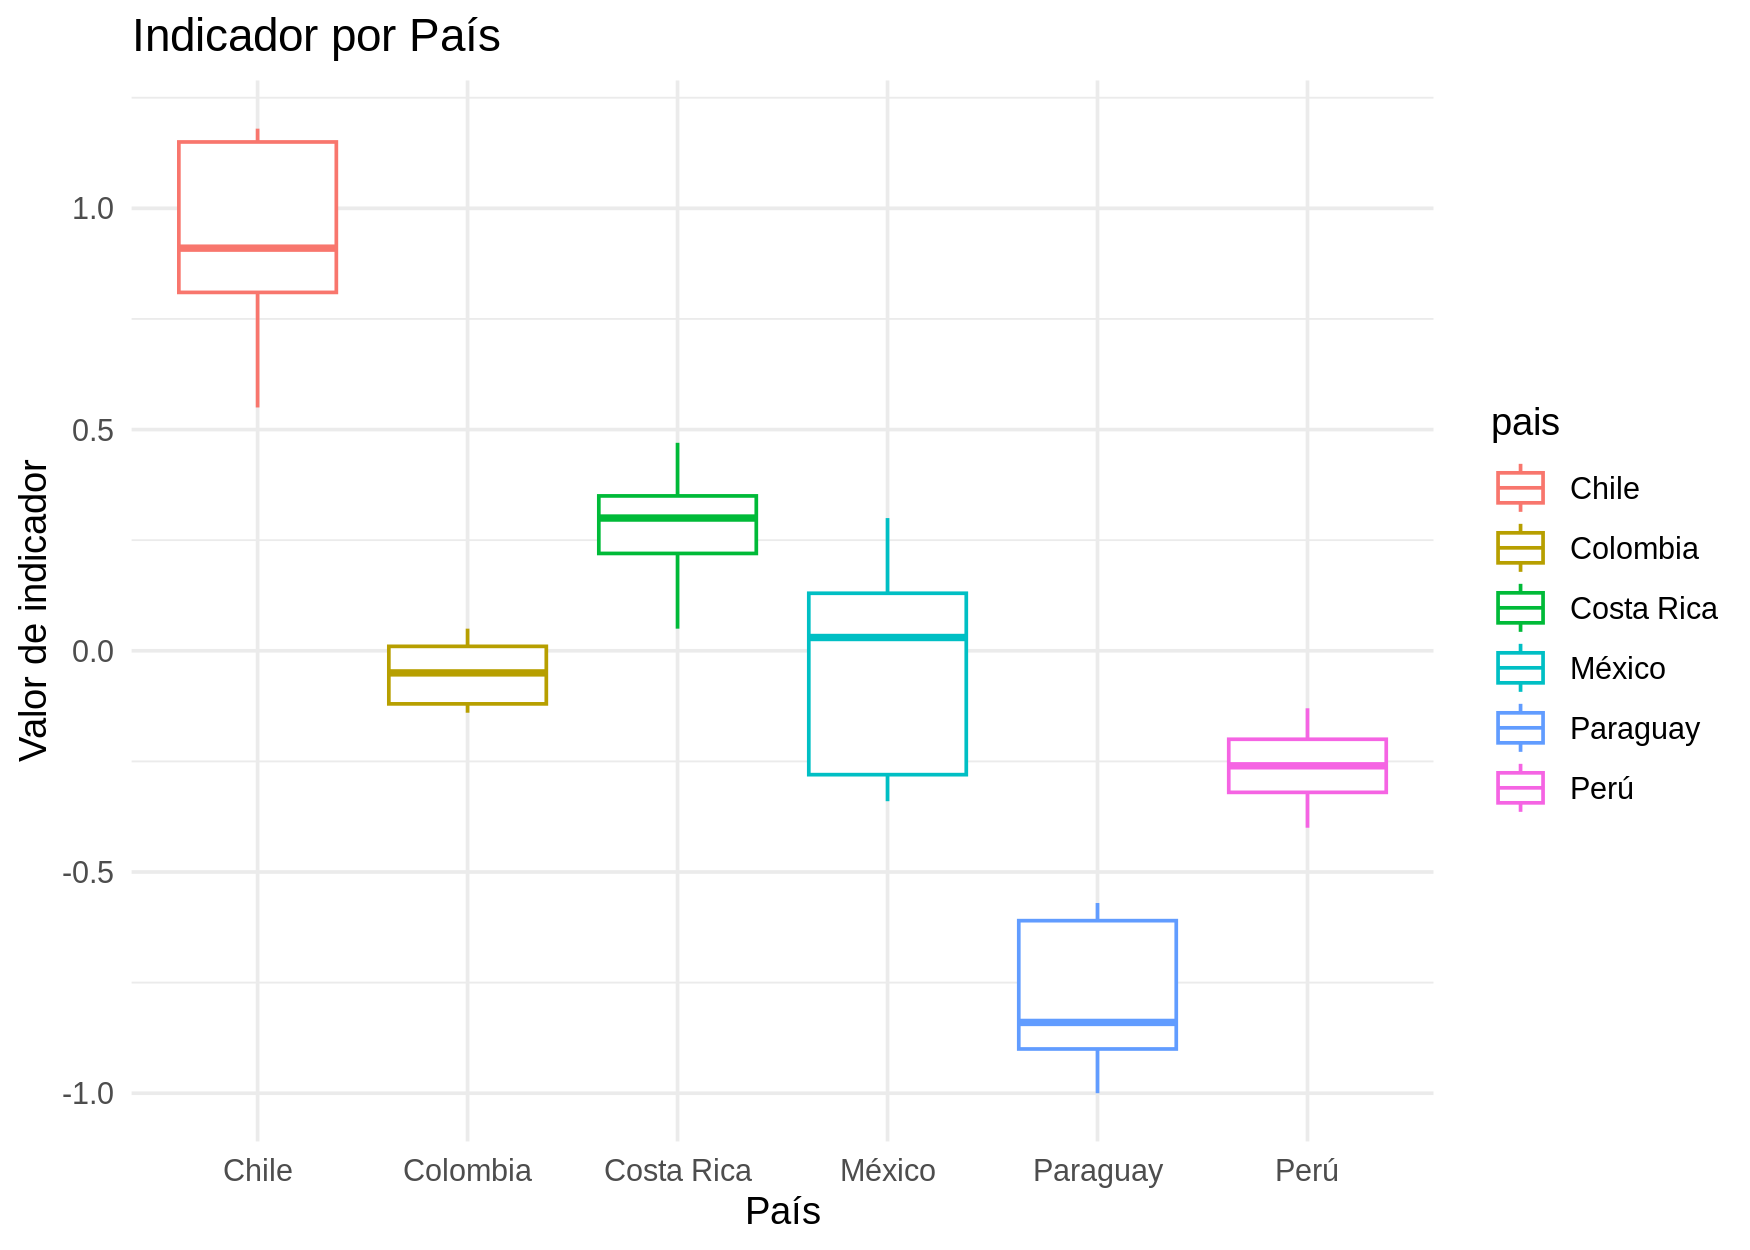

In [26]:
# Gráfico de caja
ggplot(data = indicadores, aes(x = pais, y = indic_6, color = pais)) +  # Elementos para gráfico
  theme_minimal() + # Fondo del gráfico
  geom_boxplot() +  # Boxplot
  labs(x='País', y='Valor de indicador', title = 'Indicador por País') # Los ejes más bonitos

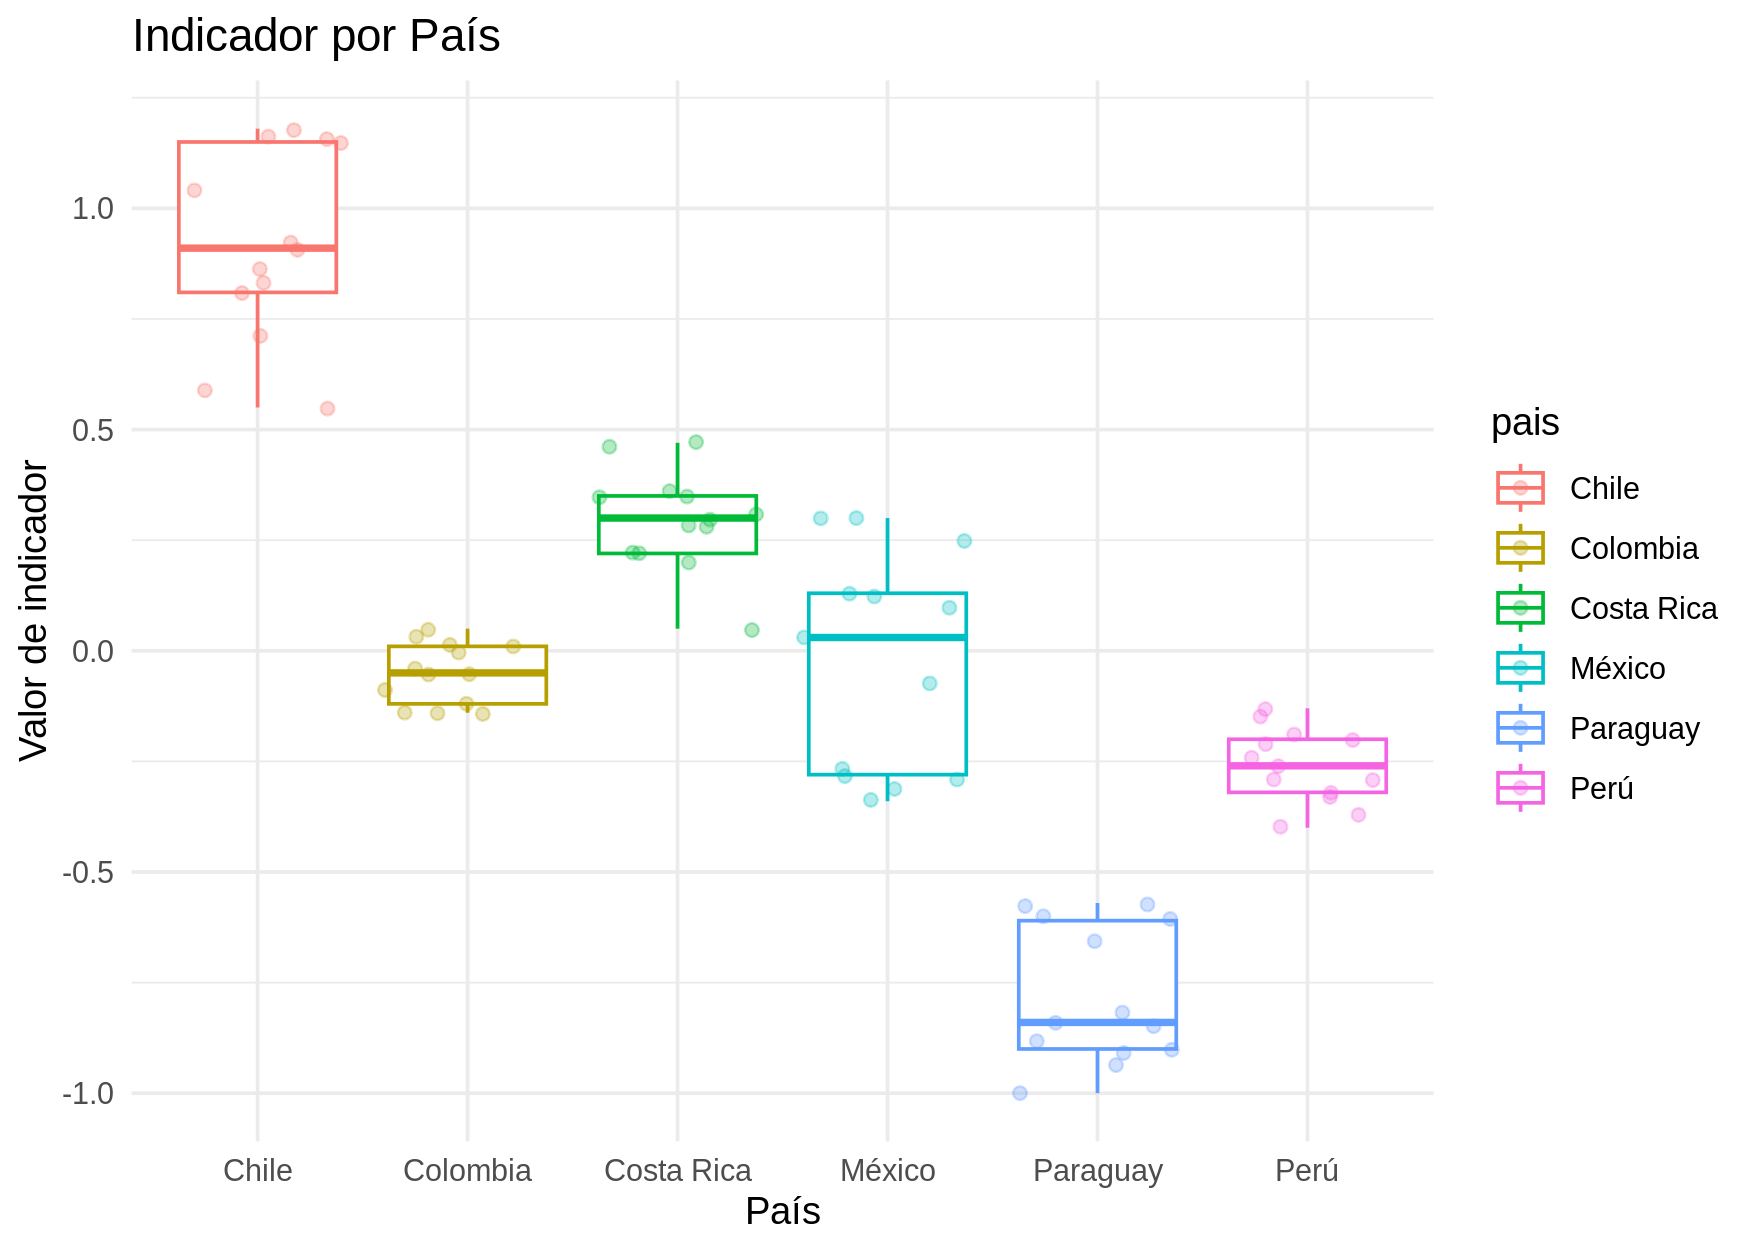

In [27]:
# Gráfico de caja con puntos
ggplot(data = indicadores, aes(x = pais, y = indic_6, color = pais)) +  # Elementos para gráfico
  theme_minimal() + # Fondo del gráfico
  geom_boxplot() +  # Boxplot
  geom_jitter(alpha = 0.3) +  # Puntos para respaldar el boxplot
  labs(x='País', y='Valor de indicador', title = 'Indicador por País')

- ['Paletas para colores'](https://cran.r-project.org/web/packages/ggsci/vignettes/ggsci.html)

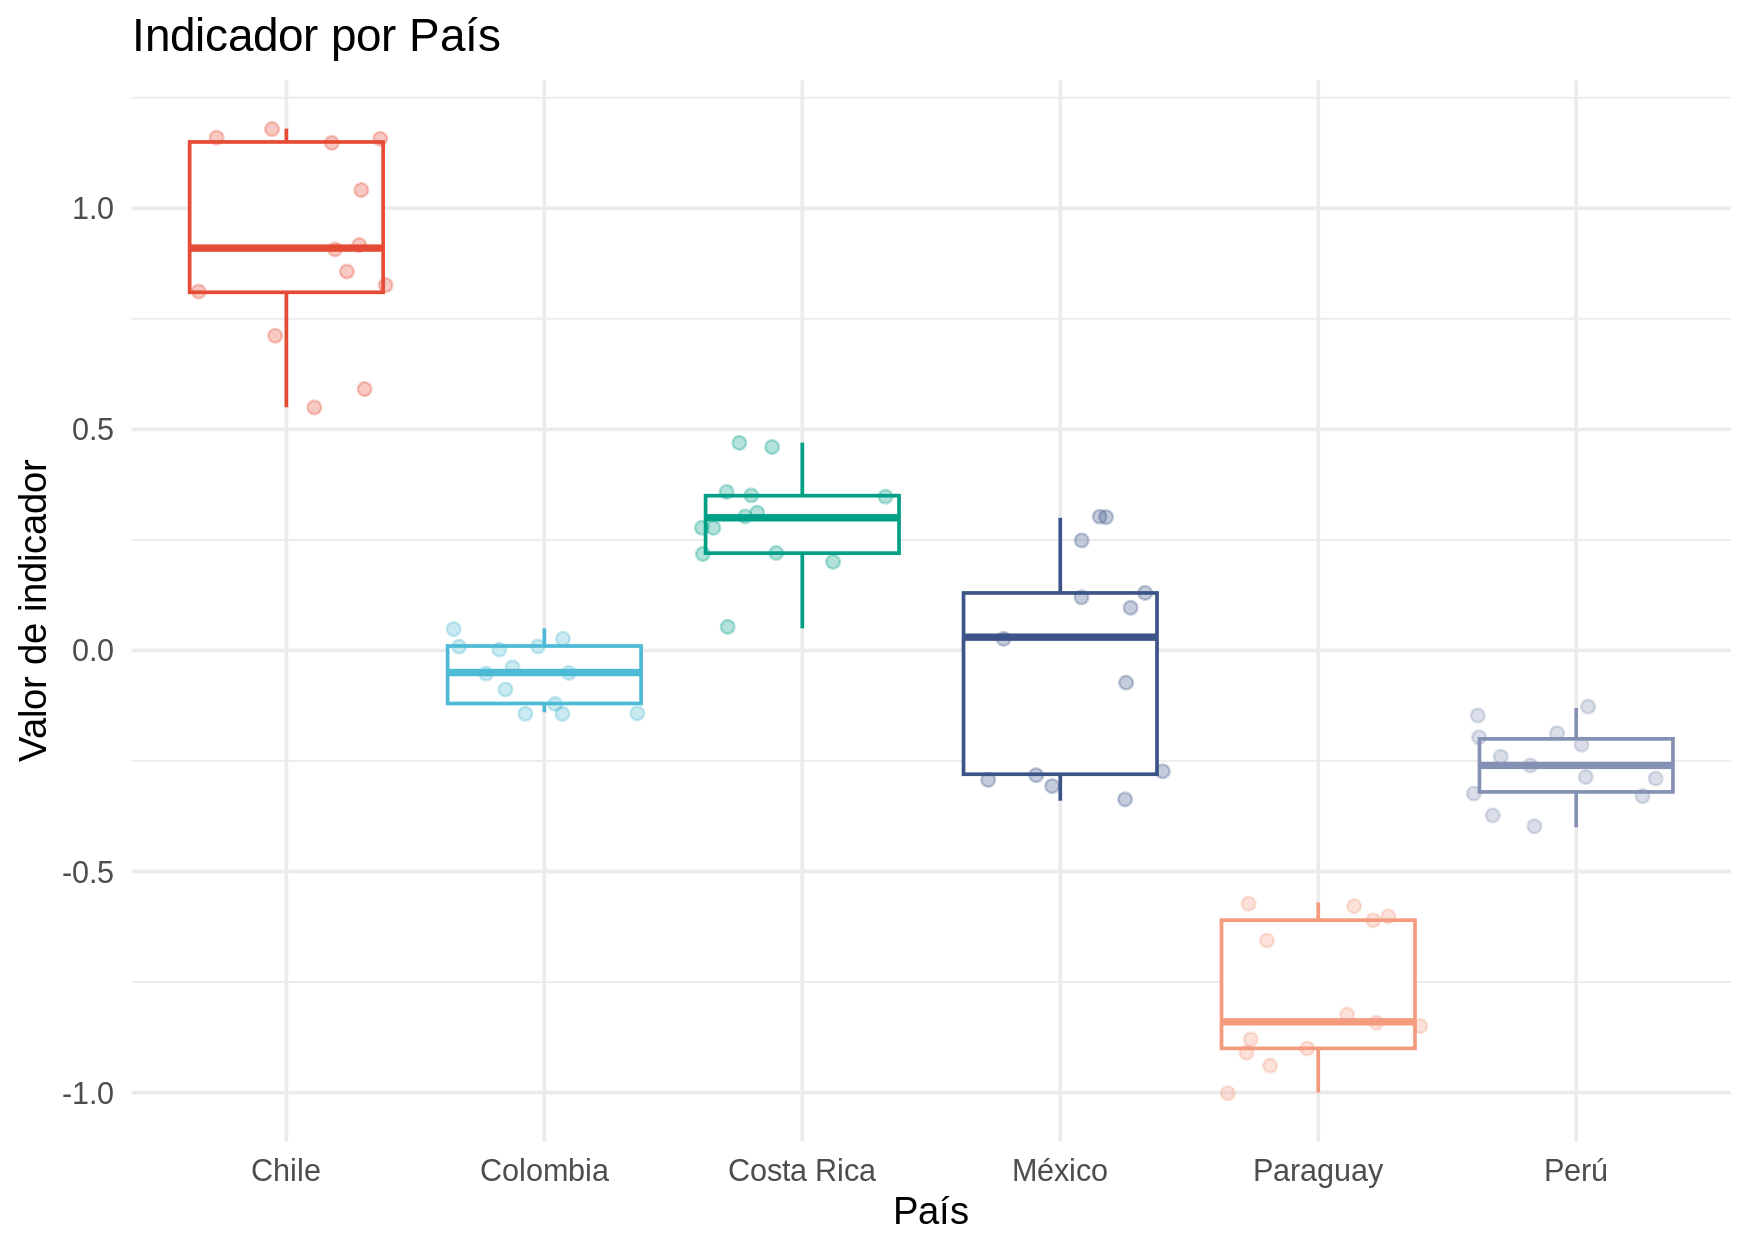

In [44]:
# Gráfico de caja con puntos, con colores selecionados y sin label
ggplot(data = indicadores, aes(x = pais, y = indic_6, color = pais)) +  # Elementos para gráfico
  theme_minimal() + # Fondo del gráfico
  geom_boxplot() +  # Boxplot
  geom_jitter(alpha = 0.3) +  # Puntos para respaldar el boxplot
  theme(legend.position = "none") + # Para quitar el label
  scale_color_npg() +  # Colores seleccionados
  labs(x='País', y='Valor de indicador', title = 'Indicador por País')

Para guardar la imagen puedes dar click derecho y descargar la imagen. Ó puedes asignar el plot a un objeto y descargarlo con la función 'ggsave' como en la siguiente celda de código.

In [39]:
plot1 <- ggplot(data = indicadores, aes(x = pais, y = indic_6, color = pais)) +  # Elementos para gráfico
            theme_minimal() + # Fondo del gráfico
            geom_boxplot() +  # Boxplot
            geom_jitter(alpha = 0.3) +  # Puntos para respaldar el boxplot
            scale_color_npg() +  # Colores seleccionados
            theme(legend.position = "none") + # Para quitar el label
            labs(x='País', y='Valor de indicador', title = 'Indicador por País')

ggsave("plot_1.png", plot1, width = 10, dpi = 300)

Saving 10 x 6.67 in image


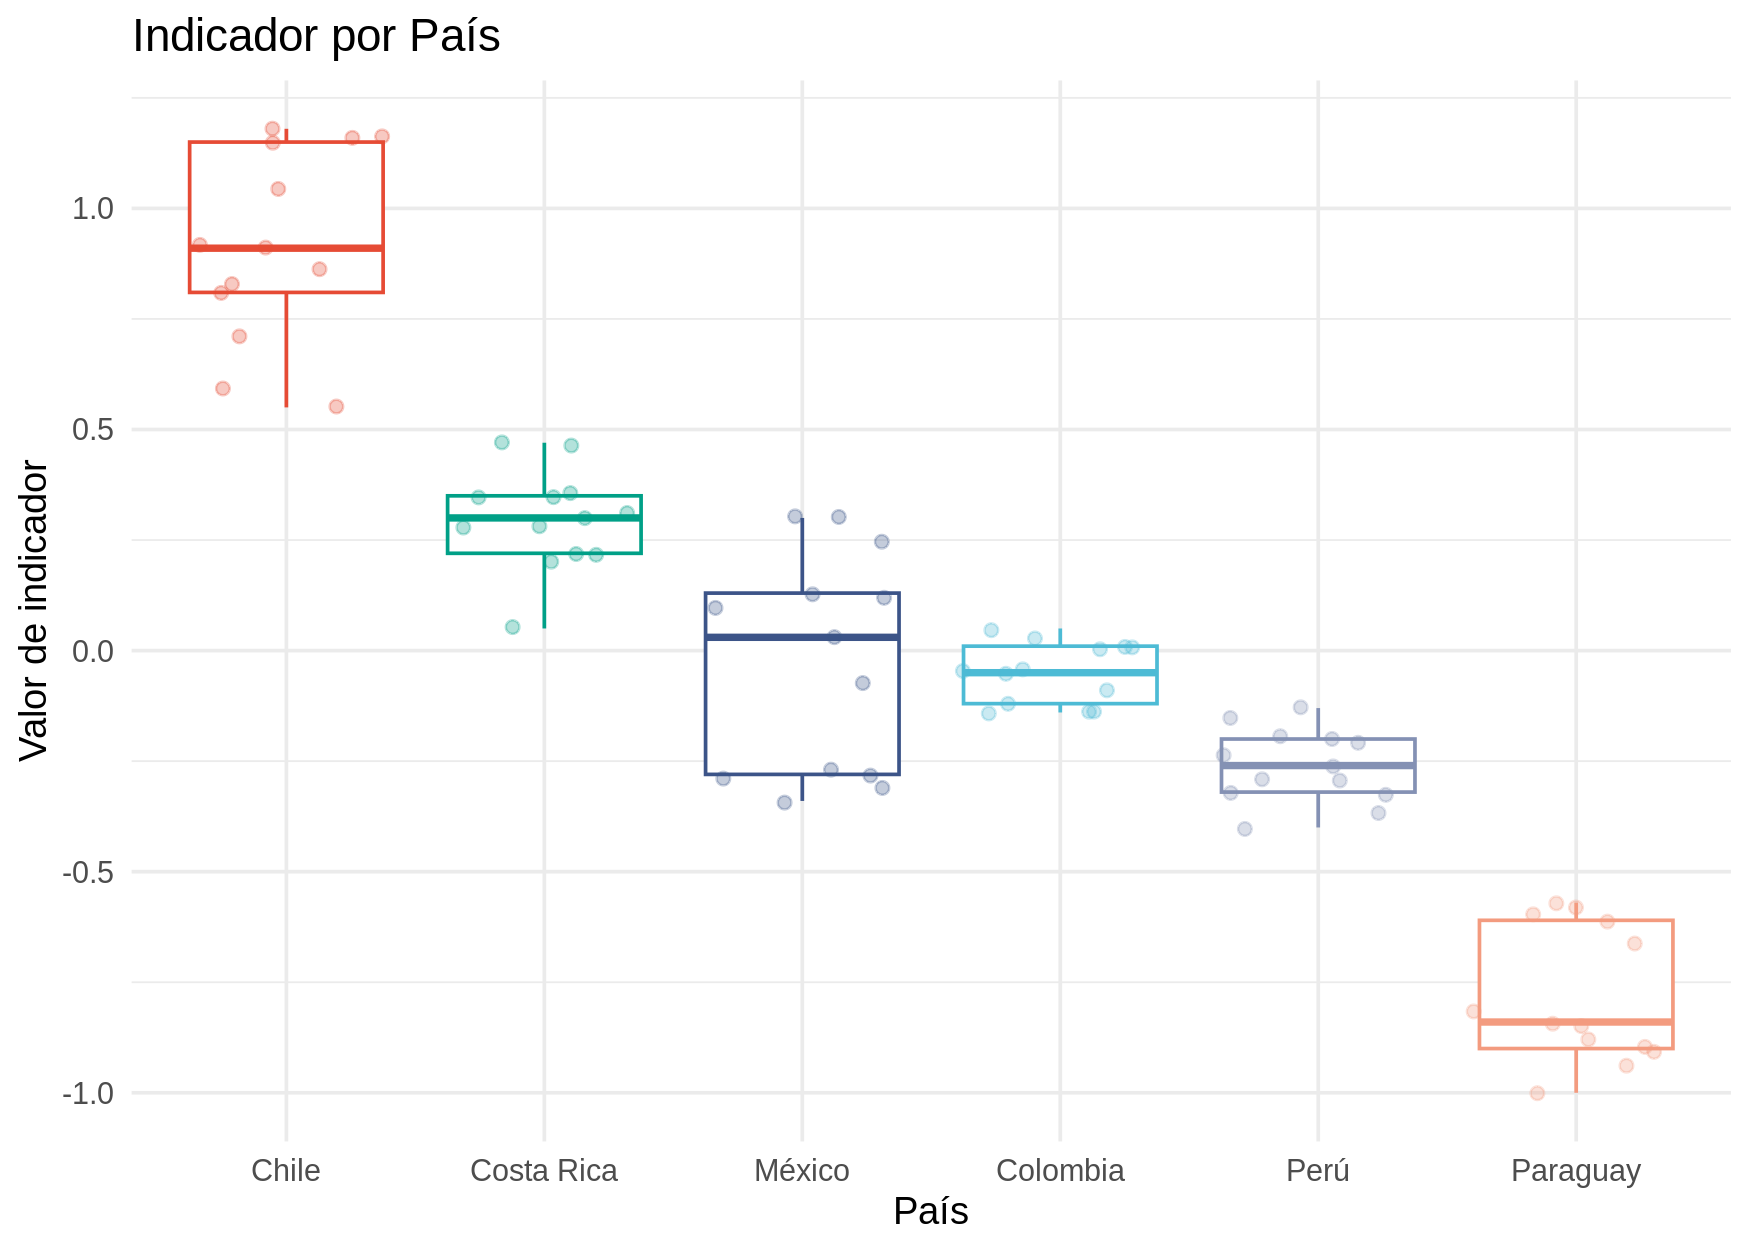

In [45]:
# Reordenamos los boxplots del indicador que tiene una distribución de valores
# más grandes a los más pequeños
ggplot(data = indicadores, aes(x = reorder(pais, -indic_6), y = indic_6, color = pais)) +  # Elementos para gráfico
  theme_minimal() + # Fondo del gráfico
  geom_boxplot() +  # Boxplot
  geom_jitter(alpha = 0.3) +  # Puntos para respaldar el boxplot
  scale_color_npg() +  # Colores seleccionados
  theme(legend.position = "none") + # Para quitar el label
  labs(x='País', y='Valor de indicador', title = 'Indicador por País')

Ahora otro tipo de gráfico:

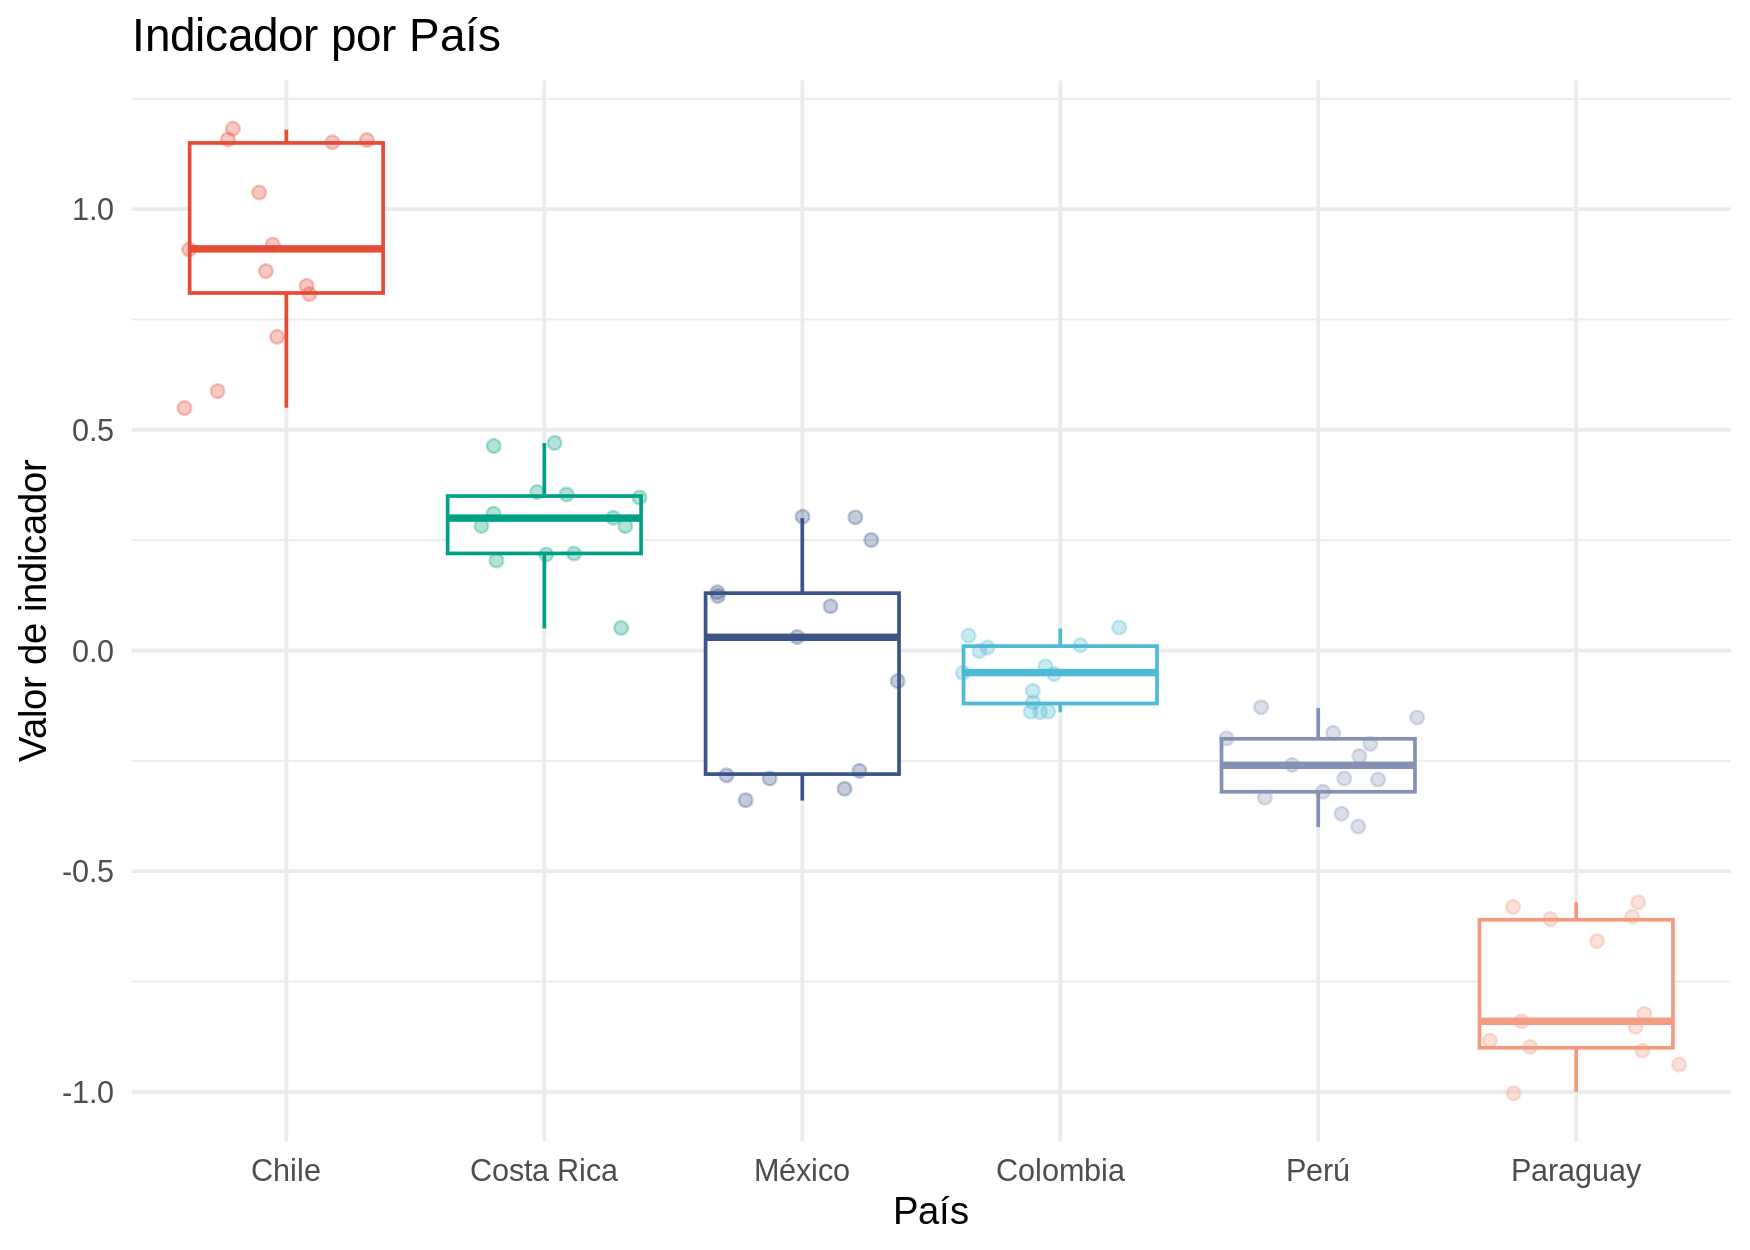

In [46]:
# Reordenamos los boxplots del indicador que tiene una distribución de valores
# más grandes a los más pequeños
ggplot(data = indicadores, aes(x = reorder(pais, -indic_6), y = indic_6, color = pais)) +  # Elementos para gráfico
  theme_minimal() + # Fondo del gráfico
  geom_boxplot() +  # Boxplot
  geom_jitter(alpha = 0.3) +  # Puntos para respaldar el boxplot
  scale_color_npg() +  # Colores seleccionados
  theme(legend.position = "none") + # Para quitar el label
  labs(x='País', y='Valor de indicador', title = 'Indicador por País')

Picking joint bandwidth of 0.0778



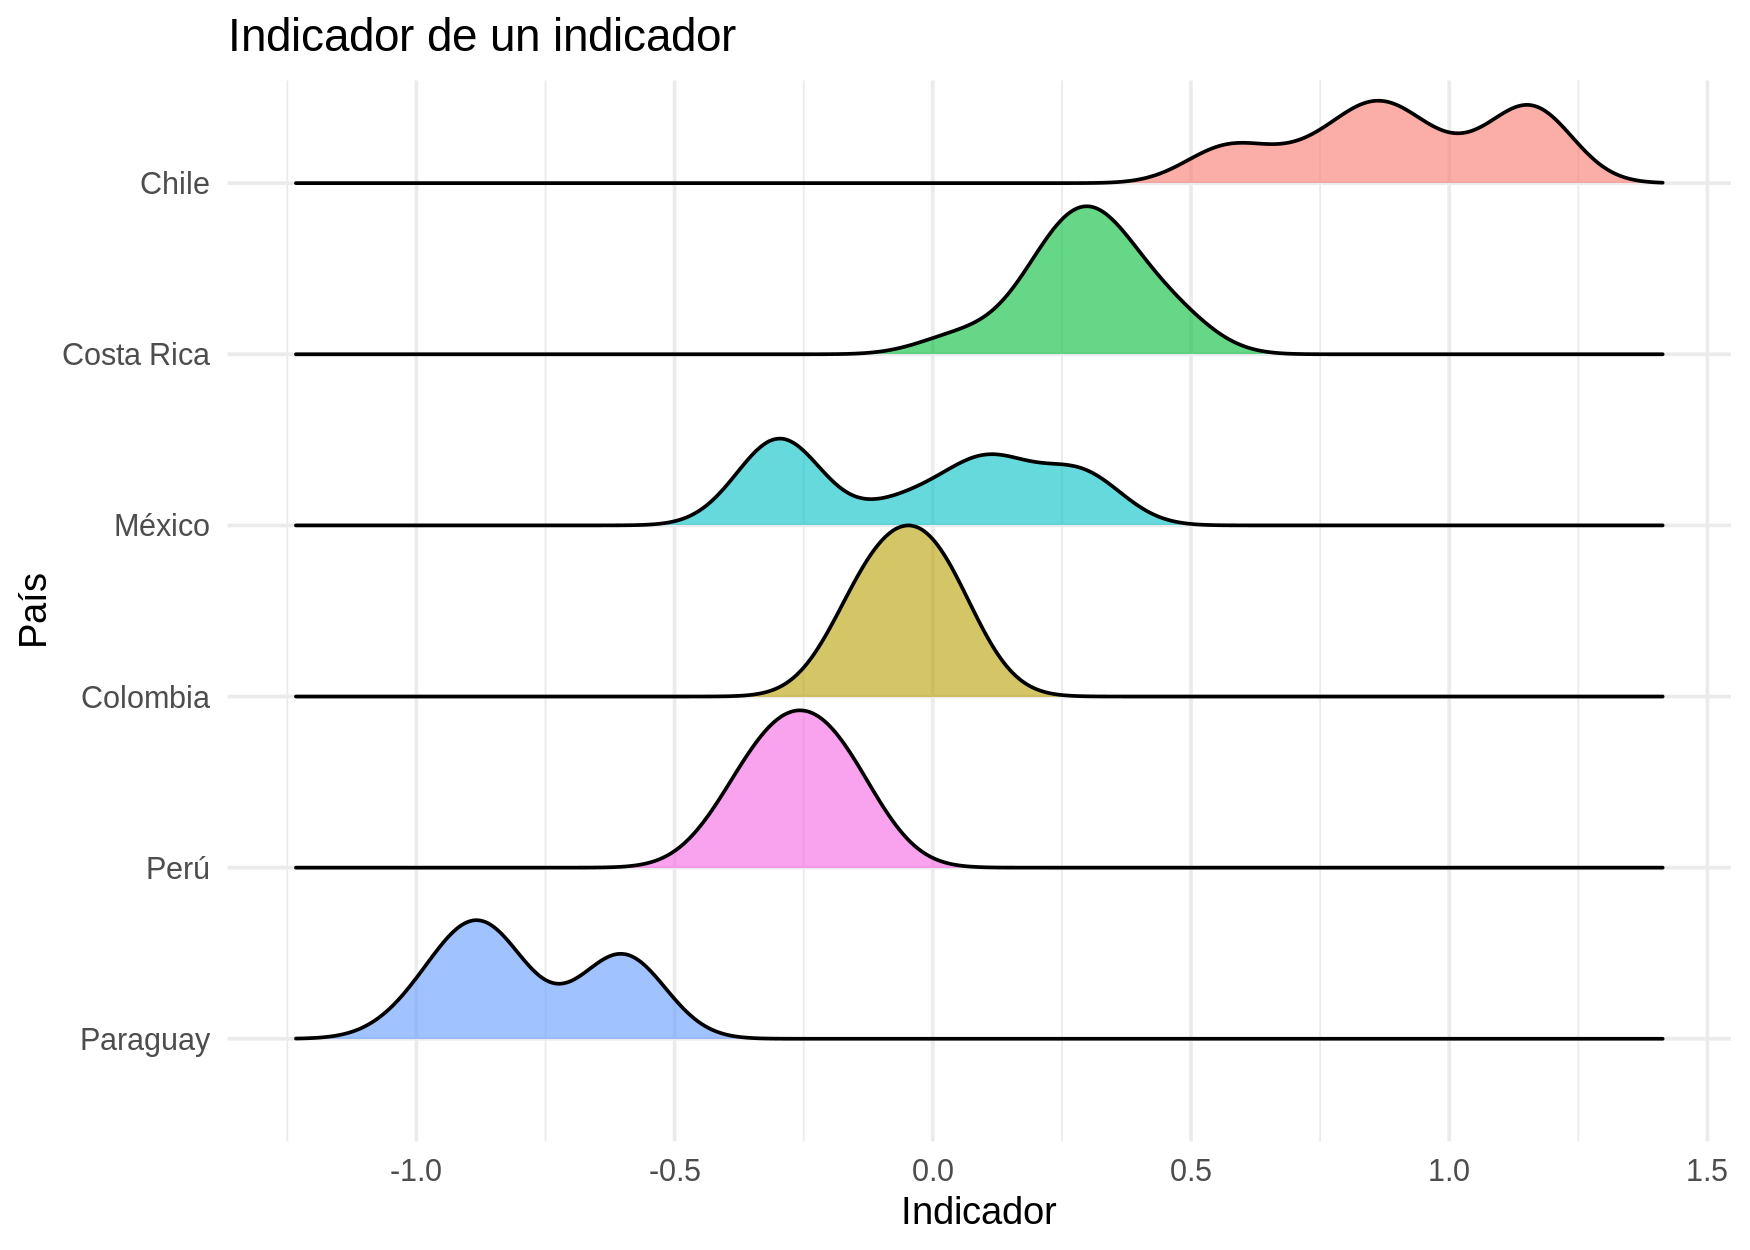

In [49]:
# Otro tipo de gráfico
ggplot(indicadores, aes(x = indic_6, y = reorder(pais,indic_6), fill = pais)) +
  geom_density_ridges(alpha=0.6,scale=1) +#, stat="binline", bins=30) +
  theme_minimal() +
  theme(legend.position = "none") +
  labs(x='Indicador', y='País', title = 'Indicador de un indicador')

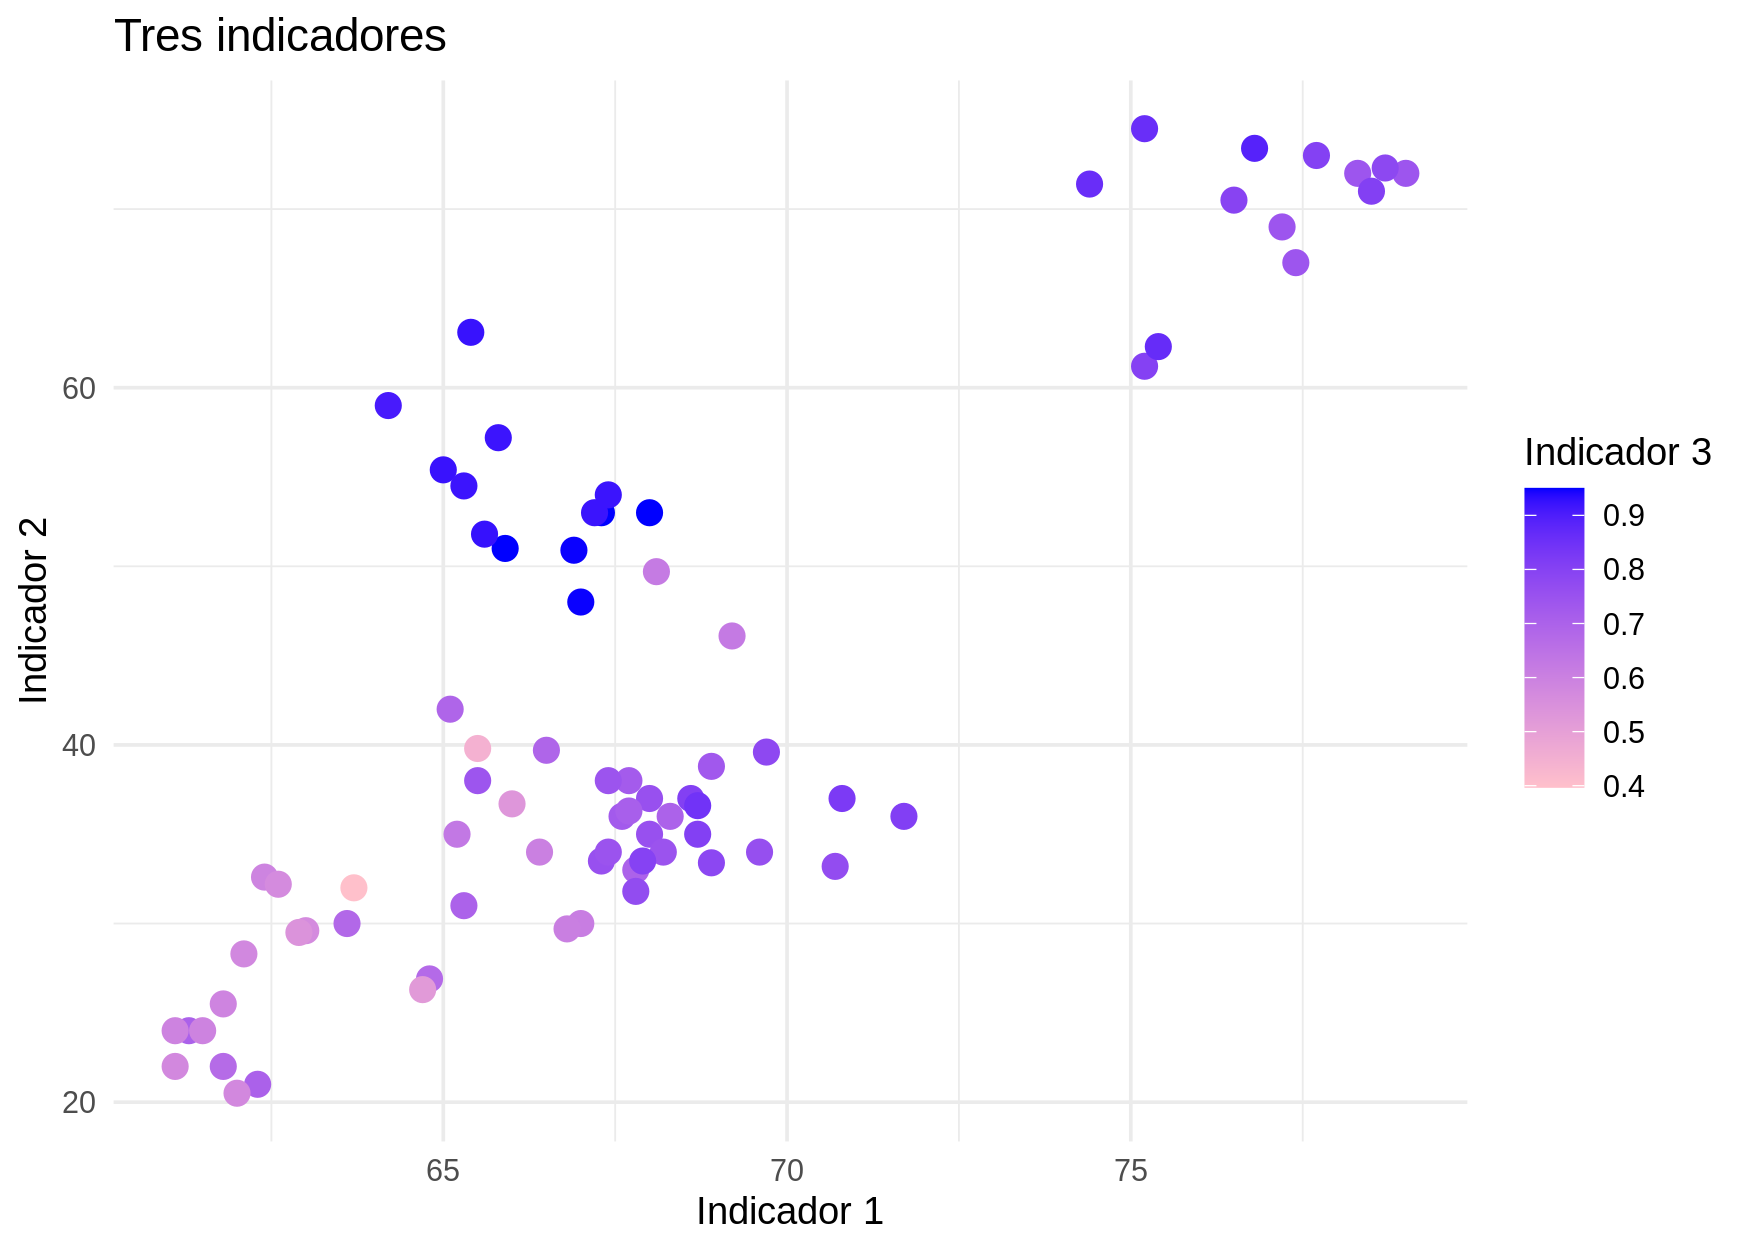

In [63]:
# Scatterplot con colores
ggplot(data = indicadores, mapping = aes(x = indic_2 , y = indic_4, color = indic_3)) +
  geom_point(size=3) +
  theme_minimal() +
  scale_color_gradient(low = "pink",  # el gradiente de color de valores bajos
                        high = "blue", # el gradiente de color de valores altos
                        name='Indicador 3')  +  # name es para cambiar el título de la legenda
  labs(x='Indicador 1', y='Indicador 2', title = 'Tres indicadores' )

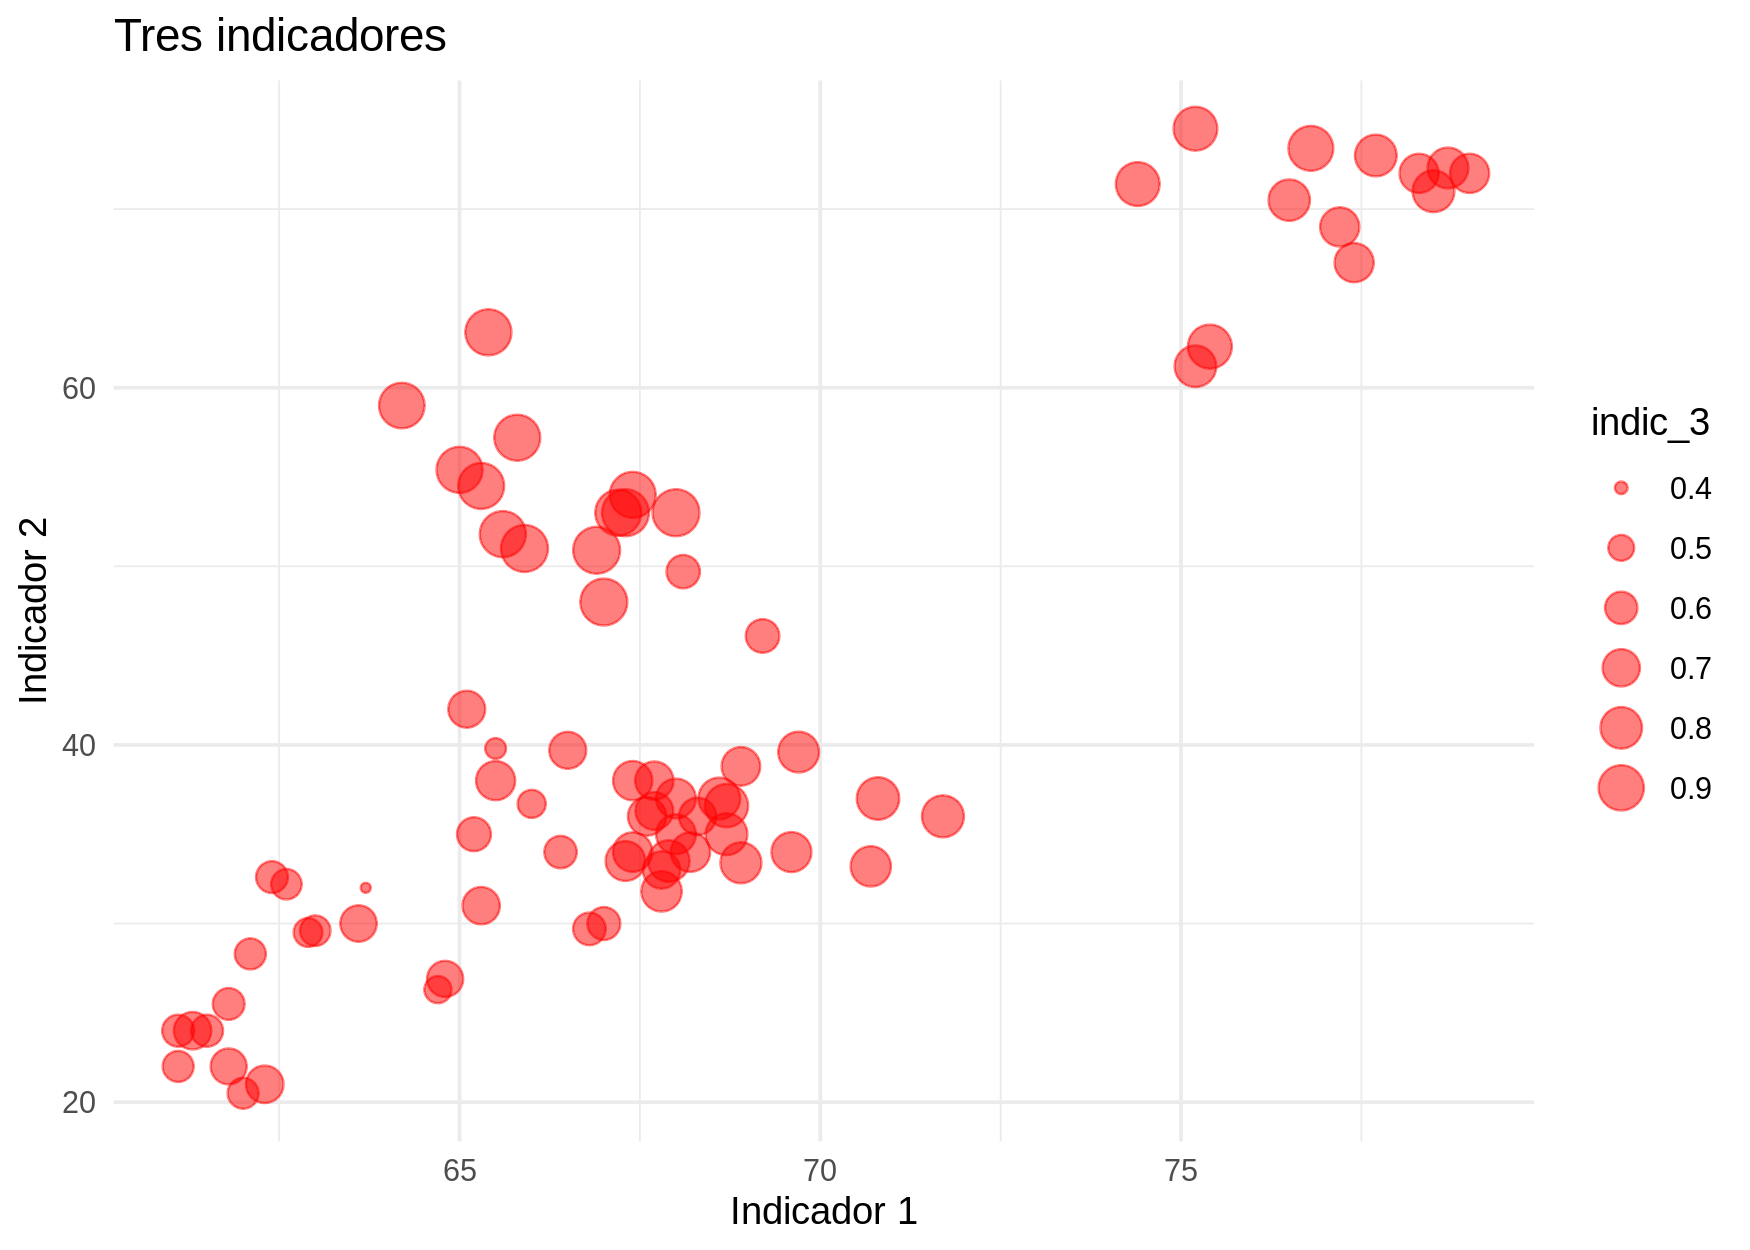

In [62]:
# Scatterplot con cambio de tercer indicador por tamaño
ggplot(data = indicadores, mapping = aes(x = indic_2 , y = indic_4, size = indic_3)) +
  geom_point(alpha=0.5, color='red') +
  theme_minimal() +
  labs(x='Indicador 1', y='Indicador 2', title = 'Tres indicadores')

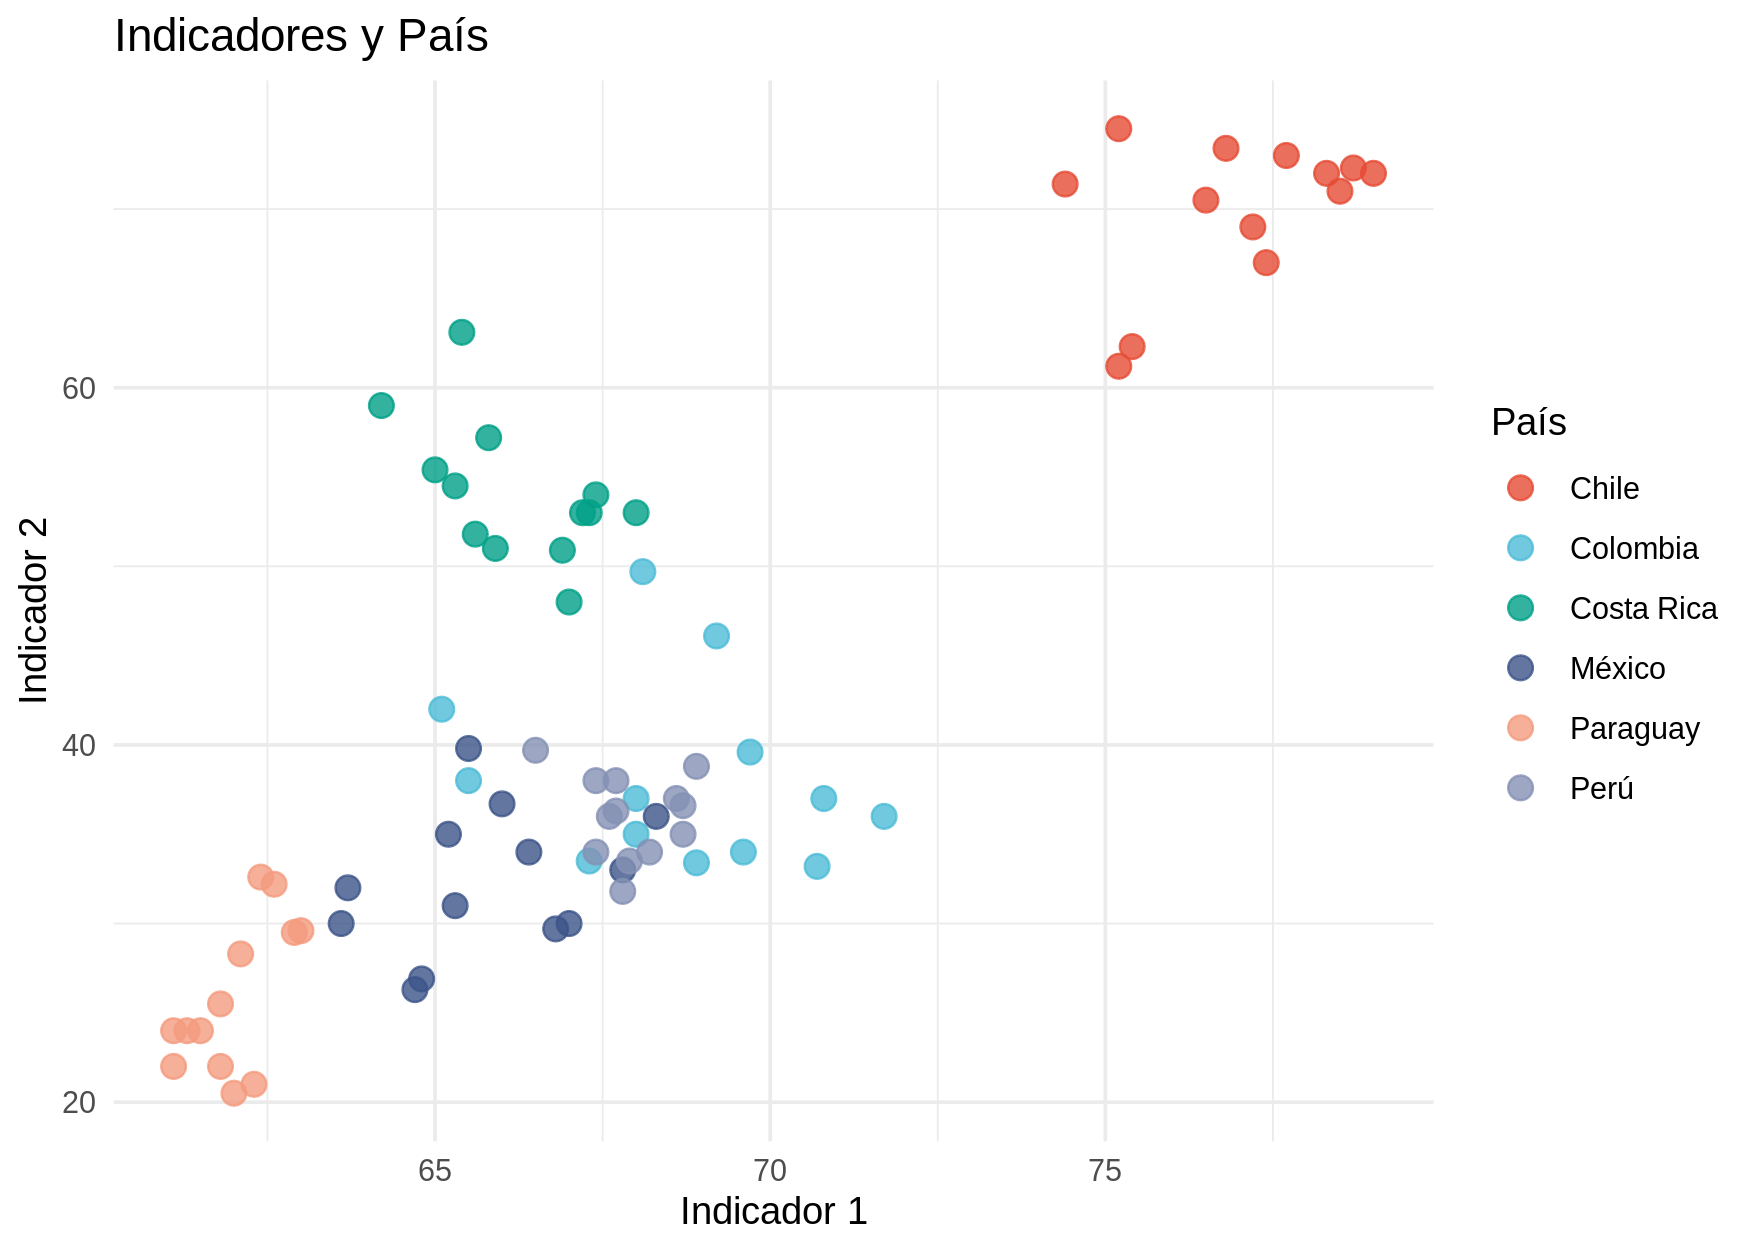

In [69]:
# Scatterplot de dos indicadores por país
ggplot(data = indicadores, aes(x = indic_2 , y = indic_4, color = pais)) +
  geom_point(size=3,alpha=0.8) +
  theme_minimal() +
  scale_color_npg(name='País') +
  labs(x='Indicador 1', y='Indicador 2', title = 'Indicadores y País' )

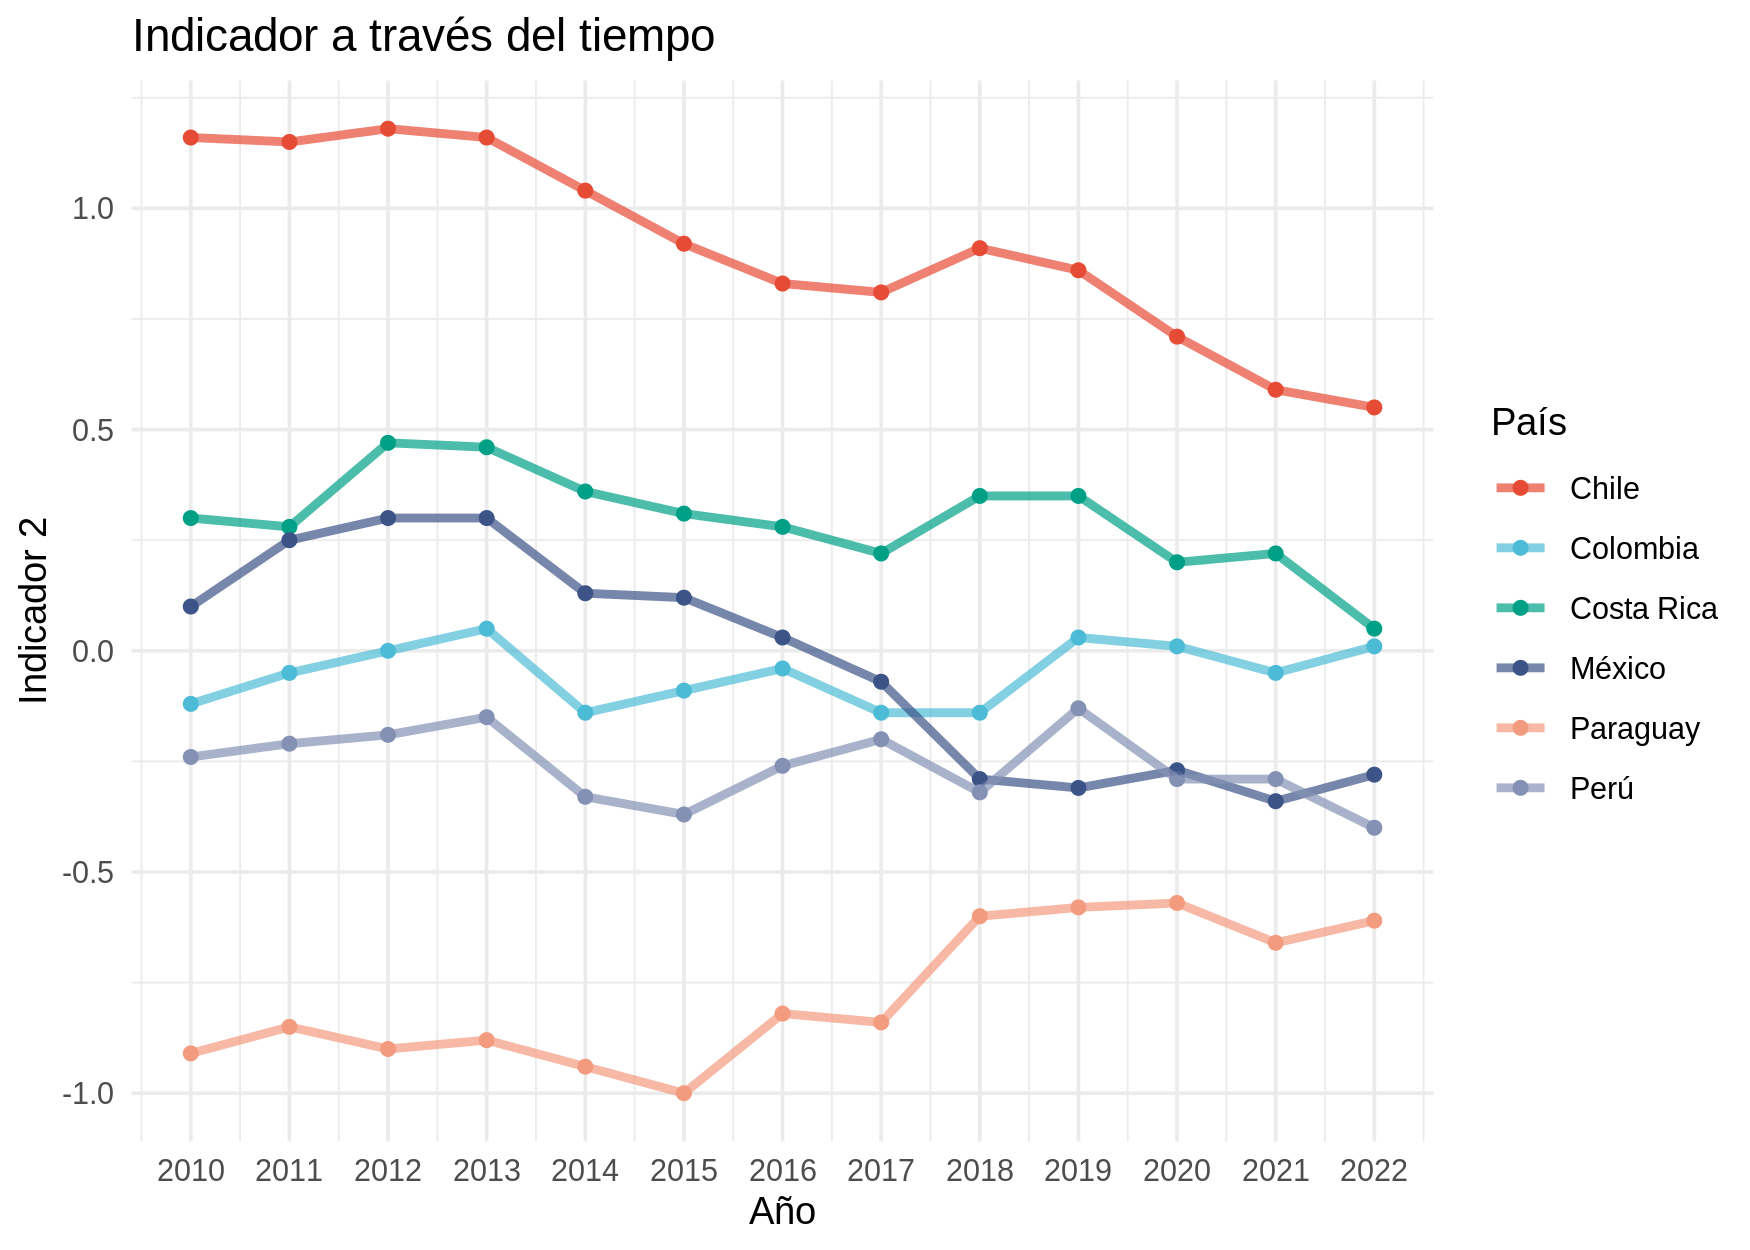

In [75]:
# Línea de tiempo
ggplot(data=indicadores, aes(x=año, y=indic_6, color=pais)) + # Elementos para gráfico
  geom_point() +
  geom_line(linewidth=1.2, alpha=0.7) + # Línea
  theme_minimal() +
  scale_color_npg(name = 'País') +
  scale_x_continuous(breaks = seq(2010,2022,1)) + # Para cambiar  los números del eje x
  labs(x='Año', y='Indicador 2', title = 'Indicador a través del tiempo' )

## Formato long

Algunas veces es necesario cambiar el formato de los datos para poder graficarlos, por ejemplo aquí tenemos un indicador por columna. Pero si también queremos hacer comparaciones entre los indicadores, podemos pasar a un formato largo.

In [81]:
head(indicadores)

pais,año,indic_1,indic_6,indic_2,indic_4,indic_3,indic_5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Chile,2010,10.50,1.16,77.2,69.0,0.742,1.10
Chile,2011,29.00,1.15,77.4,67.0,0.742,1.07
Chile,2012,NA,1.18,78.3,72.0,0.742,1.08
Chile,2013,73.76,1.16,79.0,72.0,0.742,1.11
Chile,2014,74.20,1.04,78.7,72.3,0.783,1.06
Chile,2015,77.00,0.92,78.5,71.0,0.807,1.00


In [90]:
indi_long <- pivot_longer(indicadores,cols = indic_1:indic_5, names_to = 'indis', values_to='valores_indicadores')

In [84]:
head(indi_long)

pais,año,indicadores,valores_indicadores
<chr>,<dbl>,<chr>,<dbl>
Chile,2010,indic_1,10.500
Chile,2010,indic_6,1.160
Chile,2010,indic_2,77.200
Chile,2010,indic_4,69.000
Chile,2010,indic_3,0.742
Chile,2010,indic_5,1.100


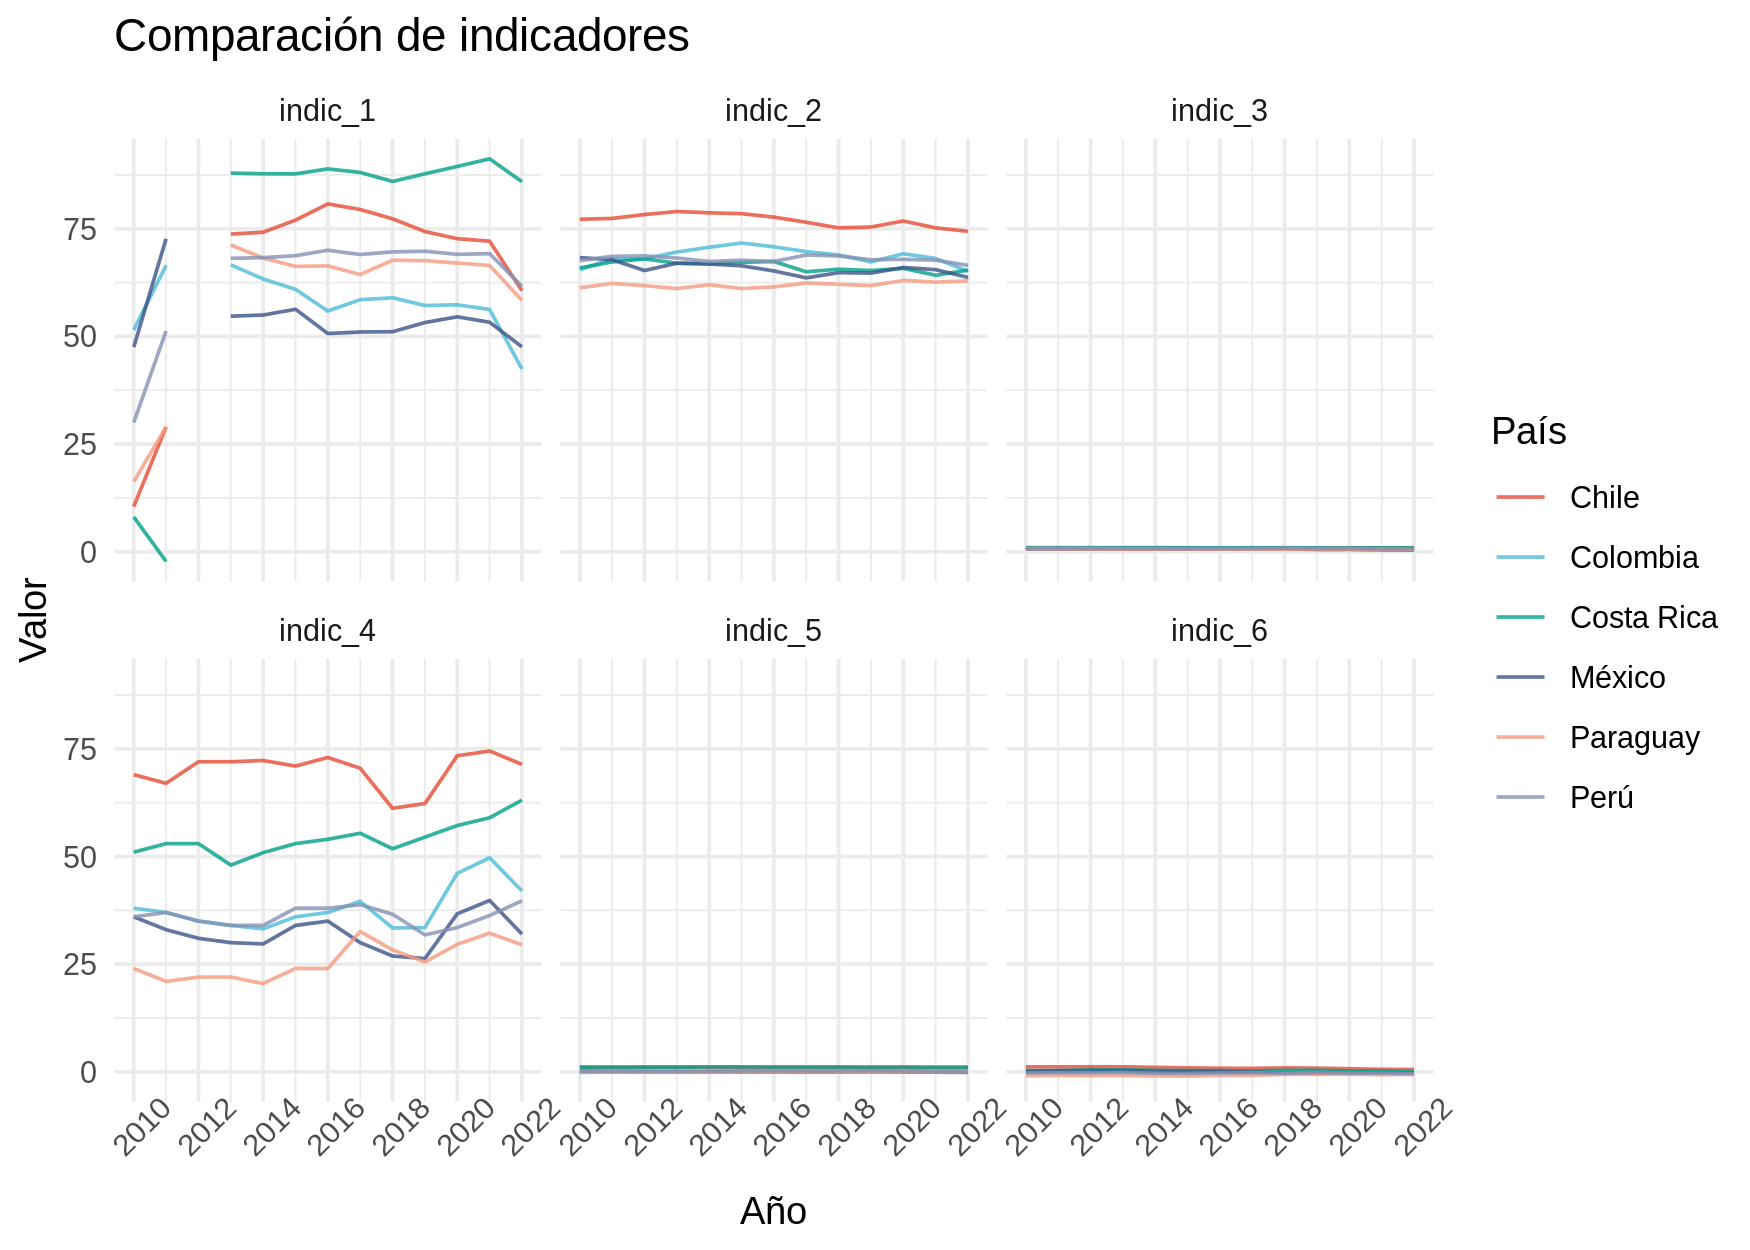

In [92]:
# Graficar todos los indicadores
ggplot(indi_long, aes(x = año, y = valores_indicadores, color = pais)) +
  theme_minimal() +
  geom_line(na.rm=TRUE, alpha=0.8) +
  facet_wrap(~indis) + # Variable categórica que queremos en cada gráfico
  scale_x_continuous(breaks = seq(2010,2022,2)) +
  theme(axis.text.x = element_text(angle = 45)) + # Ponemos los años en mejor ángulo
  scale_color_npg(name = 'País') +
  labs(x='Año', y='Valor', title = 'Comparación de indicadores')

Sabemos que los indicadores 1, 2 y 4 tienen valores más similares y el 3, 5 y 6, más similares, por lo que seleccionaremos solo las categorías que querramos graficar.

In [108]:
# Creamos dos nuevas bases de datos que tienen solo las categorías que sabemos que tienen valores similares
sc_indis1 <- subset(indi_long,  indis %in% c('indic_1', 'indic_2', 'indic_4'))
sc_indis2 <- subset(indi_long, indis %in% c('indic_3', 'indic_5', 'indic_6'))

In [110]:
head(sc_indis1)

pais,año,indis,valores_indicadores
<chr>,<dbl>,<chr>,<dbl>
Chile,2010,indic_1,10.5
Chile,2010,indic_2,77.2
Chile,2010,indic_4,69.0
Chile,2011,indic_1,29.0
Chile,2011,indic_2,77.4
Chile,2011,indic_4,67.0


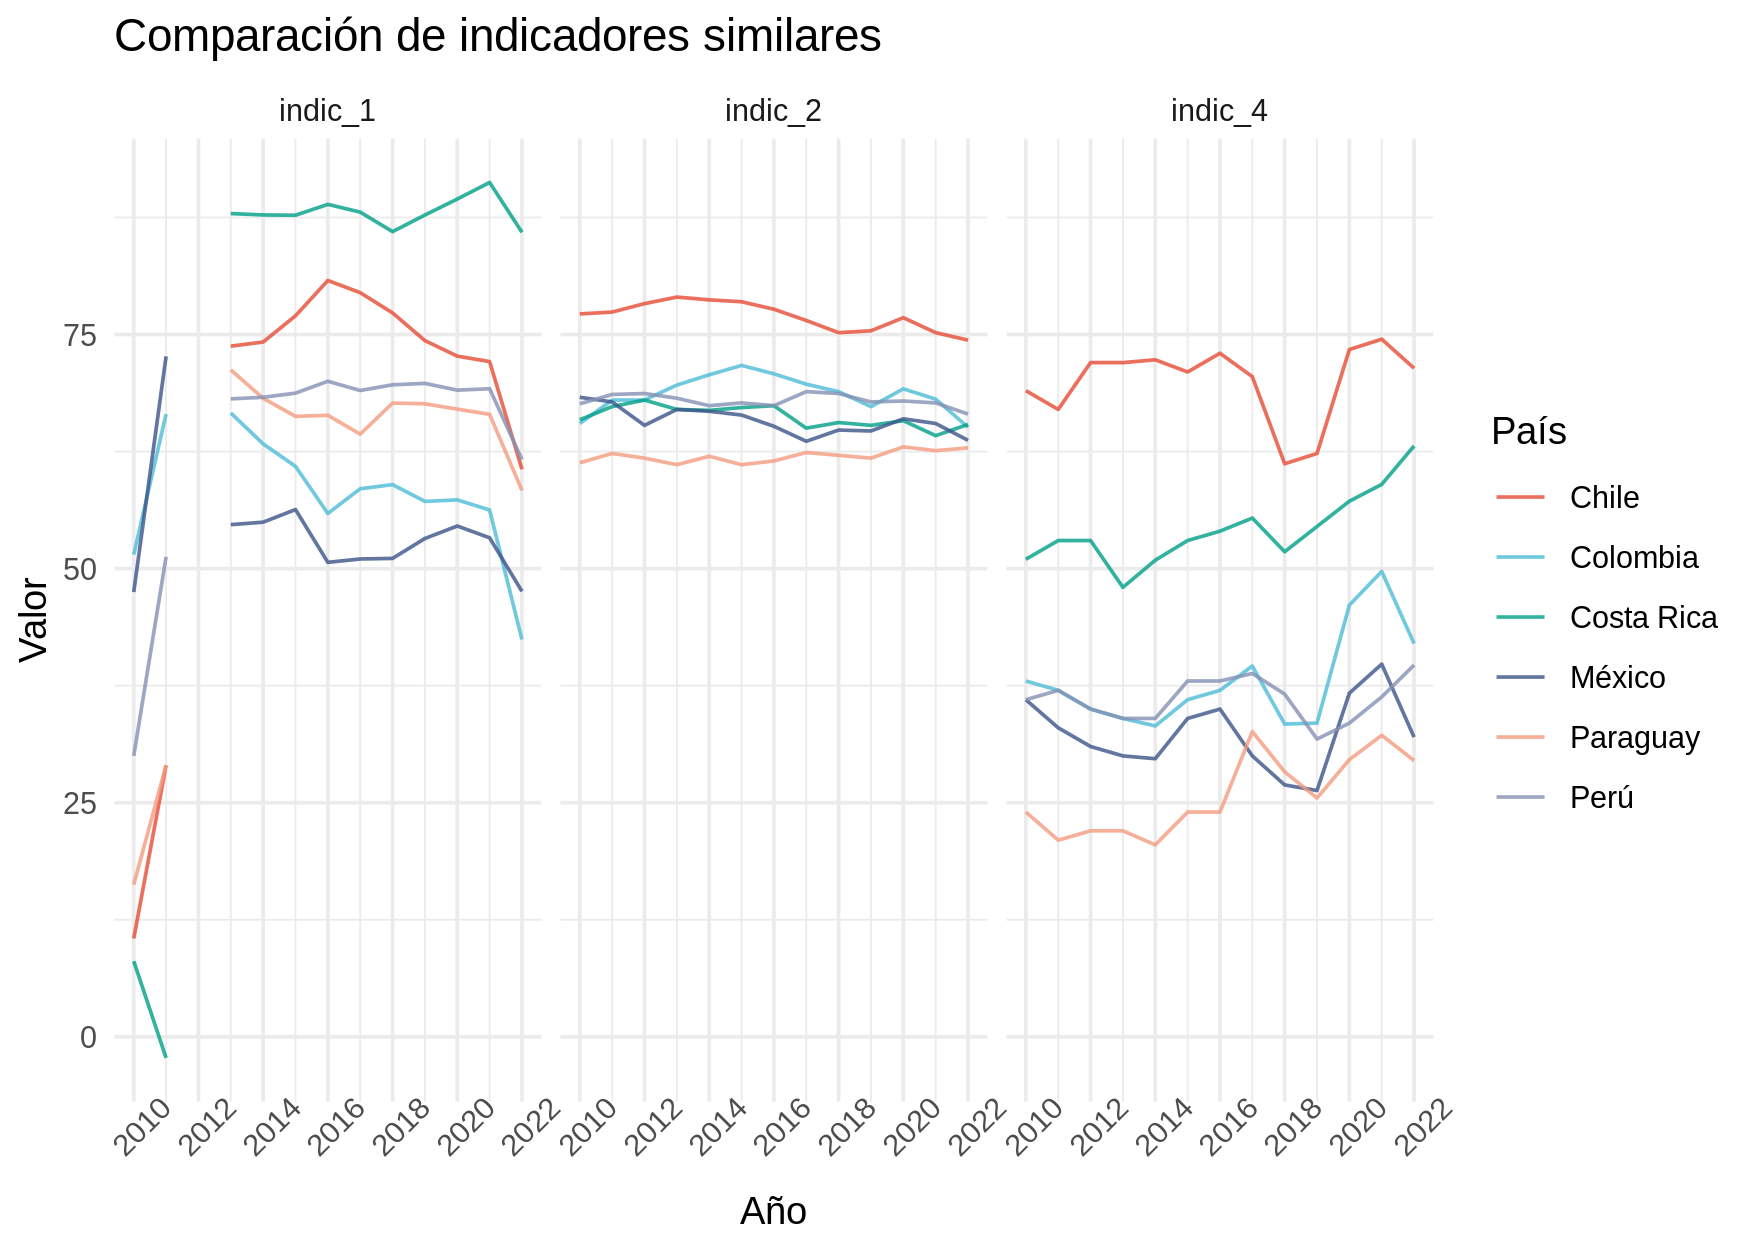

In [113]:
# Graficar todos los indicadores
ggplot(sc_indis1, aes(x = año, y = valores_indicadores, color = pais)) +
  theme_minimal() +
  geom_line(na.rm=TRUE, alpha=0.8) +
  facet_wrap(~indis) + # Variable categórica que queremos en cada gráfico
  scale_x_continuous(breaks = seq(2010,2022,2)) +
  theme(axis.text.x = element_text(angle = 45)) + # Ponemos los años en mejor ángulo
  scale_color_npg(name = 'País') +
  labs(x='Año', y='Valor', title = 'Comparación de indicadores similares')

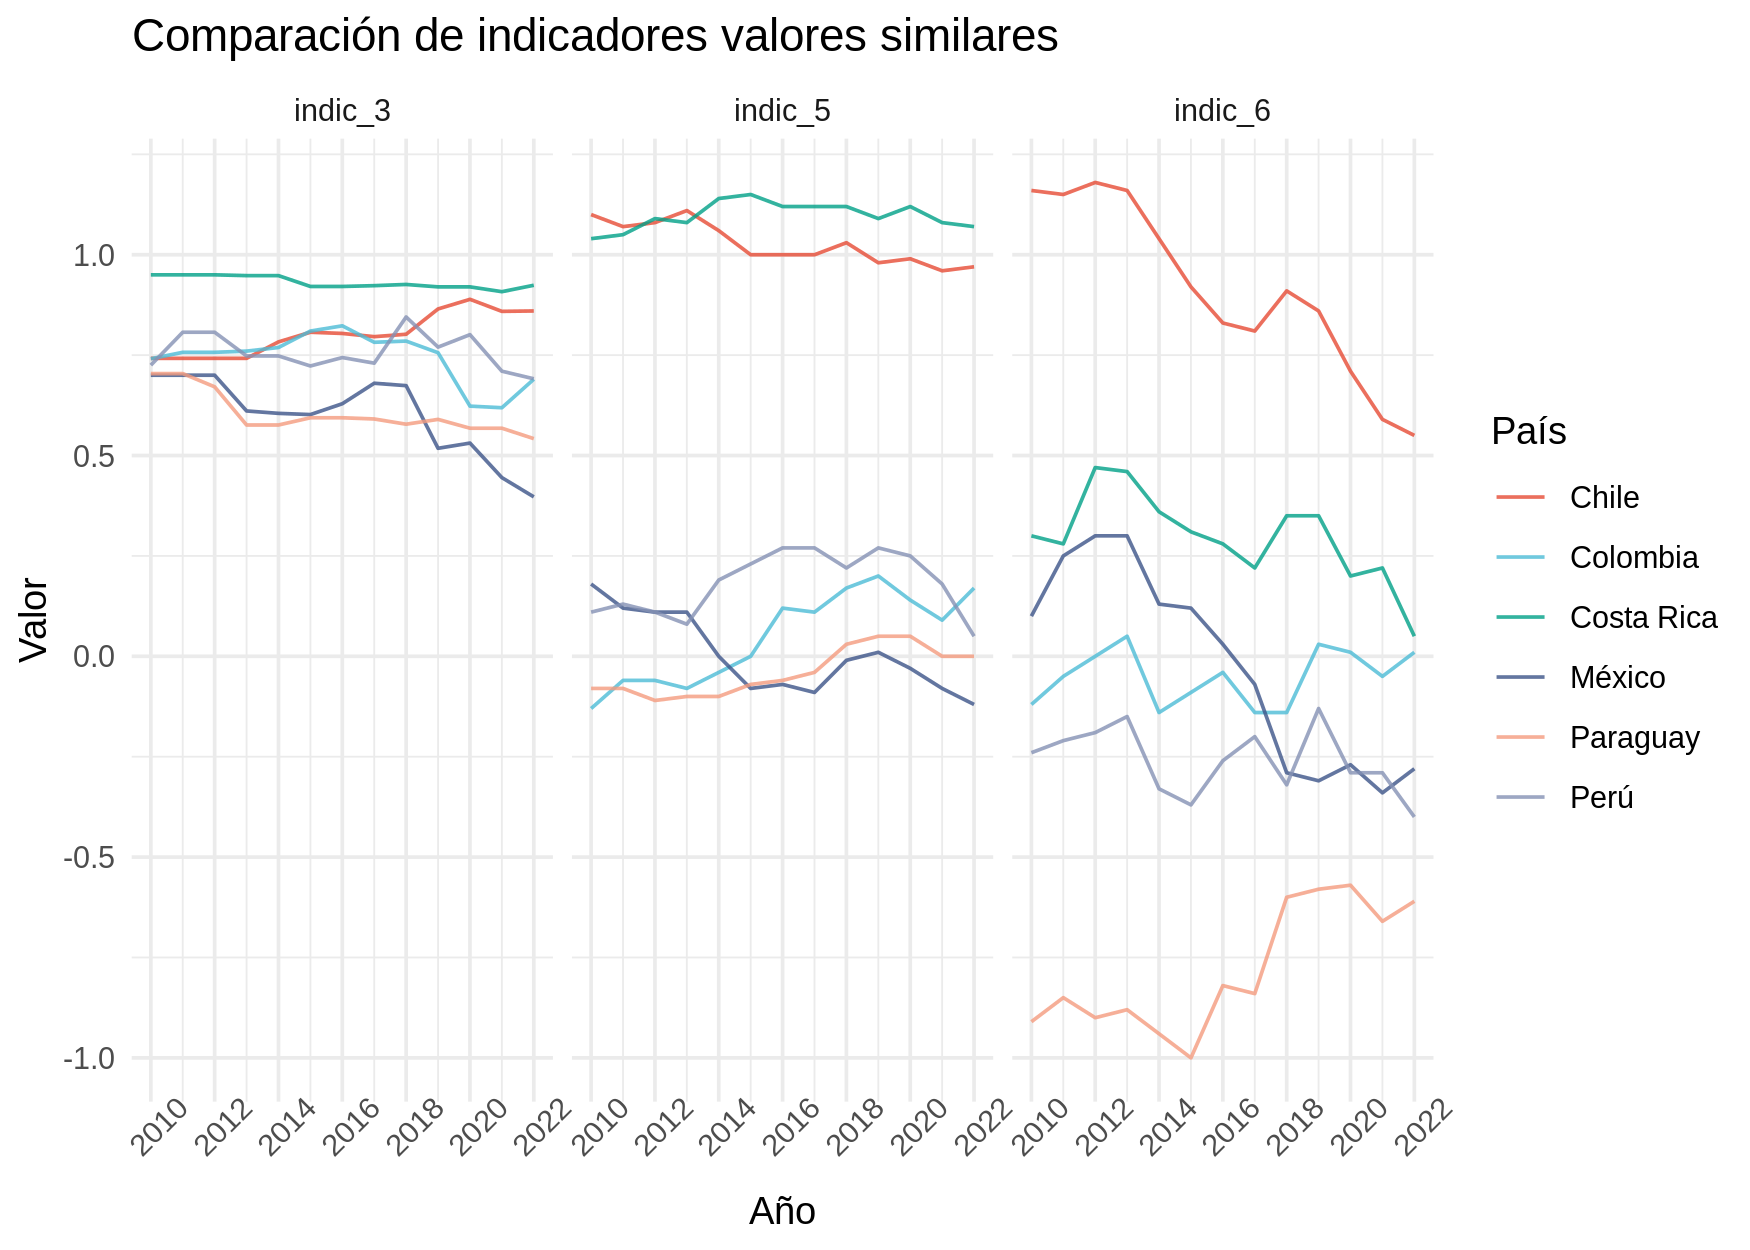

In [114]:
# Graficar todos los indicadores
ggplot(sc_indis2, aes(x = año, y = valores_indicadores, color = pais)) +
  theme_minimal() +
  geom_line(na.rm=TRUE, alpha=0.8) +
  facet_wrap(~indis) + # Variable categórica que queremos en cada gráfico
  scale_x_continuous(breaks = seq(2010,2022,2)) +
  theme(axis.text.x = element_text(angle = 45)) + # Ponemos los años en mejor ángulo
  scale_color_npg(name = 'País') +
  labs(x='Año', y='Valor', title = 'Comparación de indicadores valores similares')

Luego queremos hacer una comparación para un solo país, por ejemplo, Chile:

In [126]:
chile <- subset(indi_long, pais == "Chile")

In [127]:
head(chile)

pais,año,indis,valores_indicadores
<chr>,<dbl>,<chr>,<dbl>
Chile,2010,indic_1,10.500
Chile,2010,indic_6,1.160
Chile,2010,indic_2,77.200
Chile,2010,indic_4,69.000
Chile,2010,indic_3,0.742
Chile,2010,indic_5,1.100


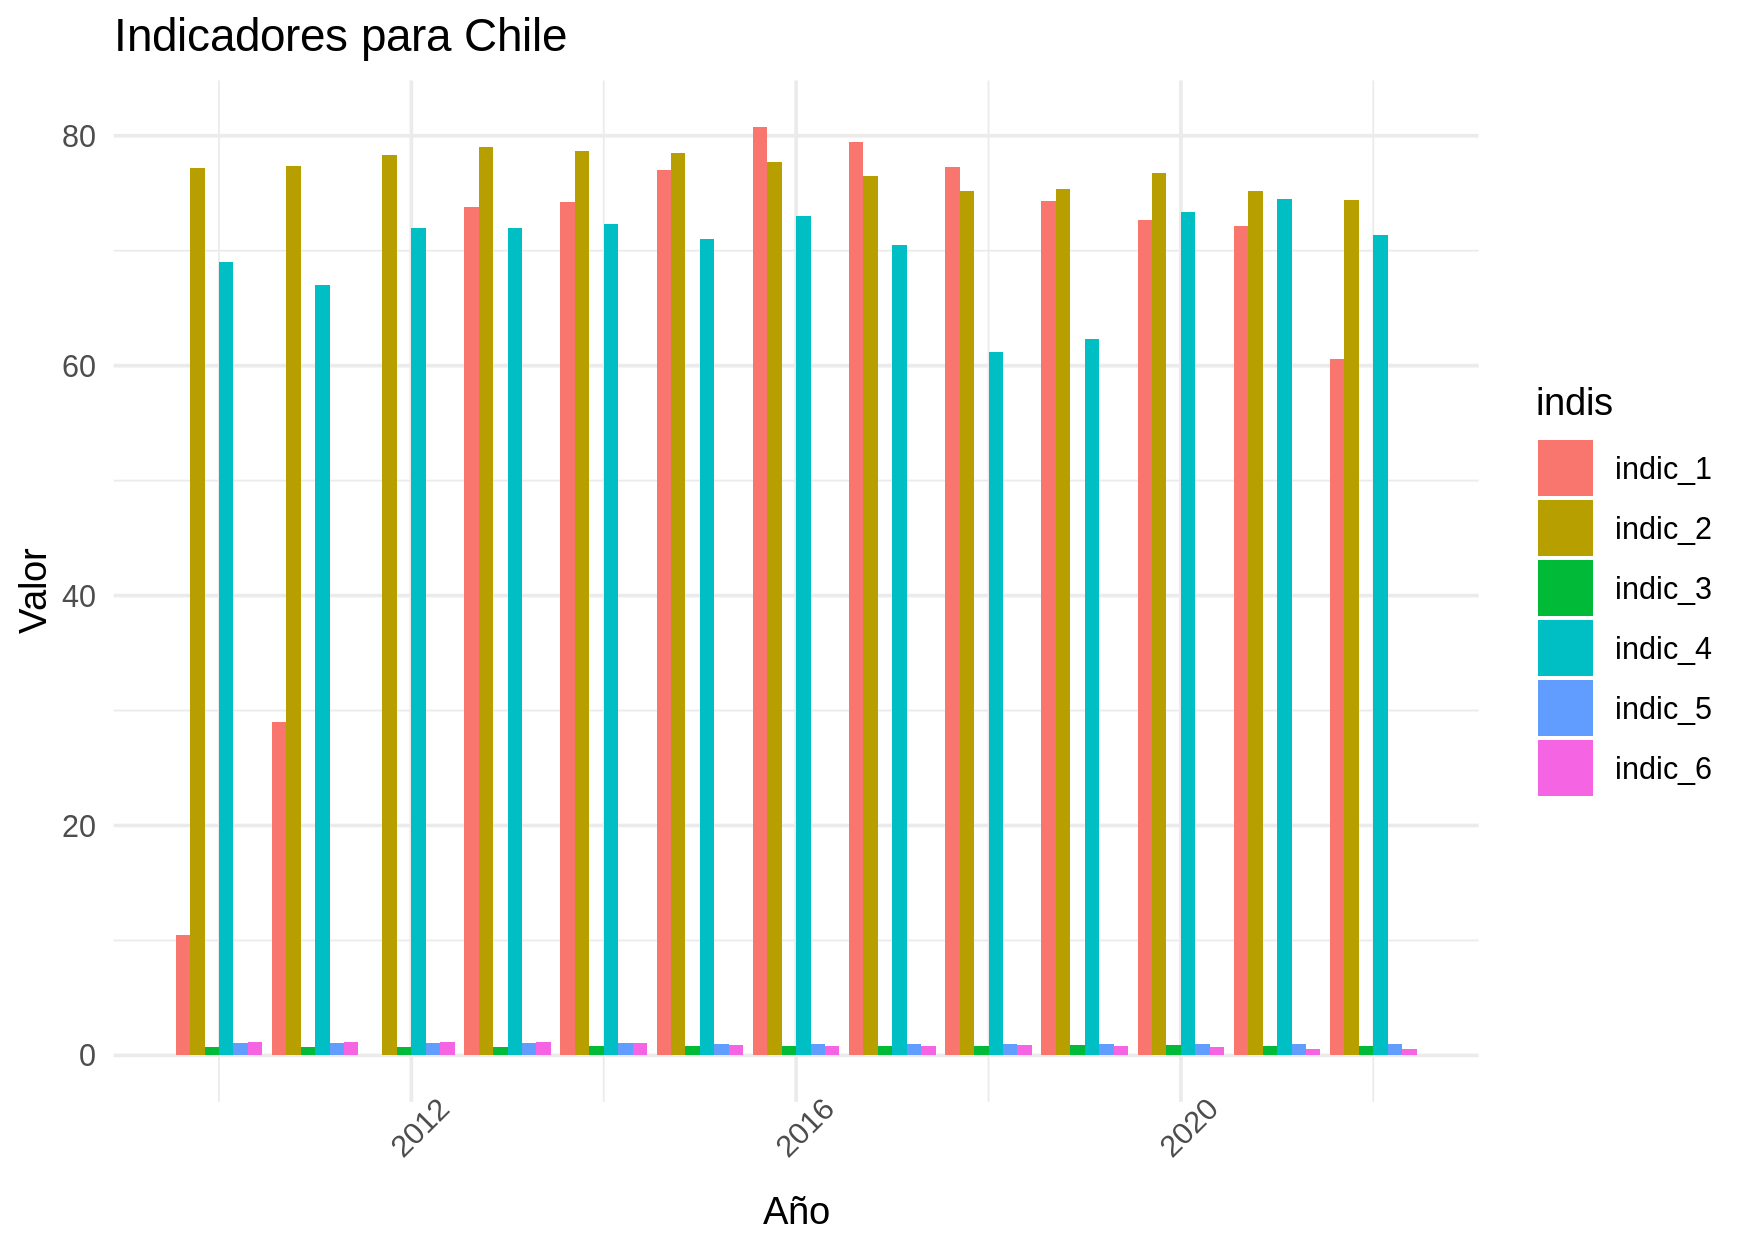

In [129]:
# Gráfico de barras
ggplot(chile, aes(x=año,y=valores_indicadores,fill=indis))+
  geom_bar(stat="identity",position=position_dodge(), na.rm= TRUE) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45)) + # Ponemos los años en mejor ángulo
  labs(x='Año', y='Valor', title = 'Indicadores para Chile')

Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


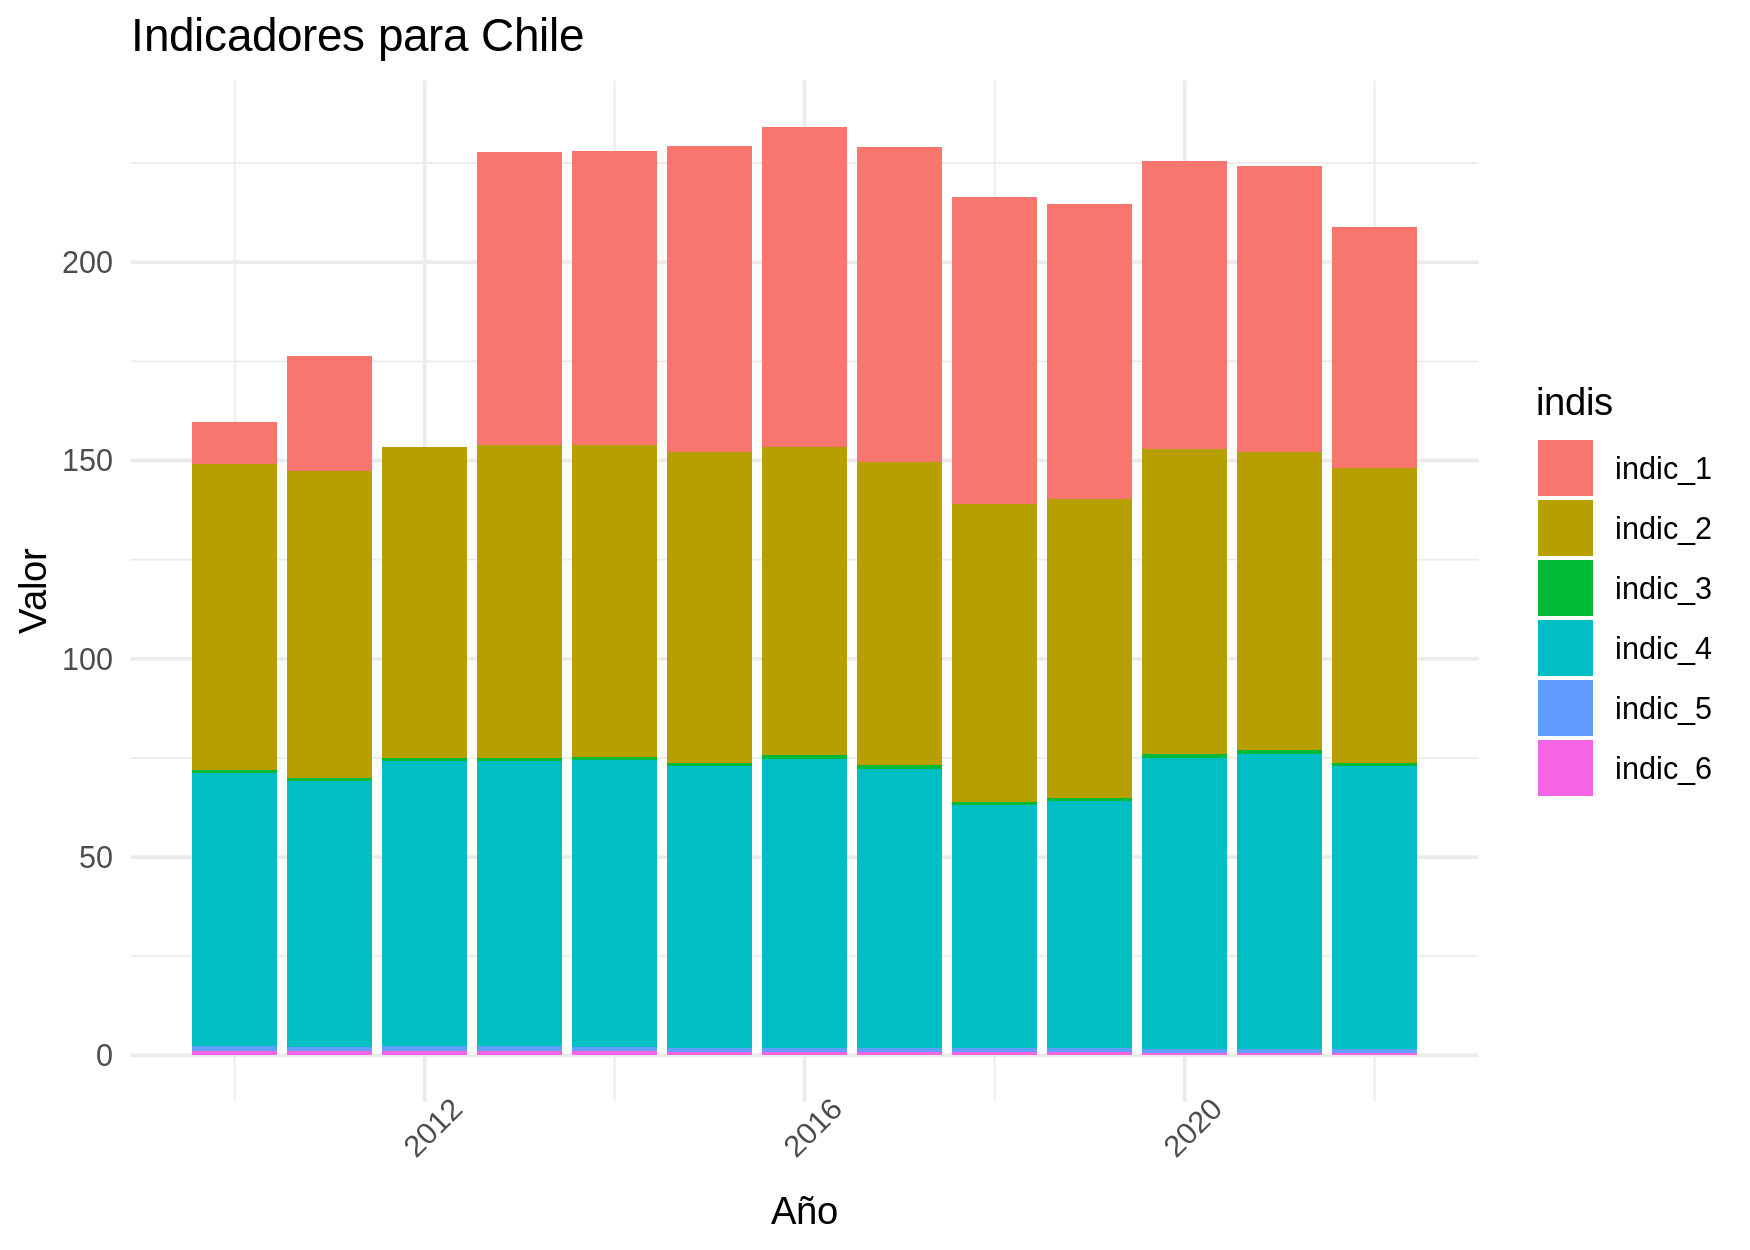

In [131]:
# Otro gráfico de barras
ggplot(chile, aes(x=año,y=valores_indicadores,fill=indis))+
  geom_bar(stat="identity", na.rm= TRUE) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45)) + # Ponemos los años en mejor ángulo
  labs(x='Año', y='Valor', title = 'Indicadores para Chile')

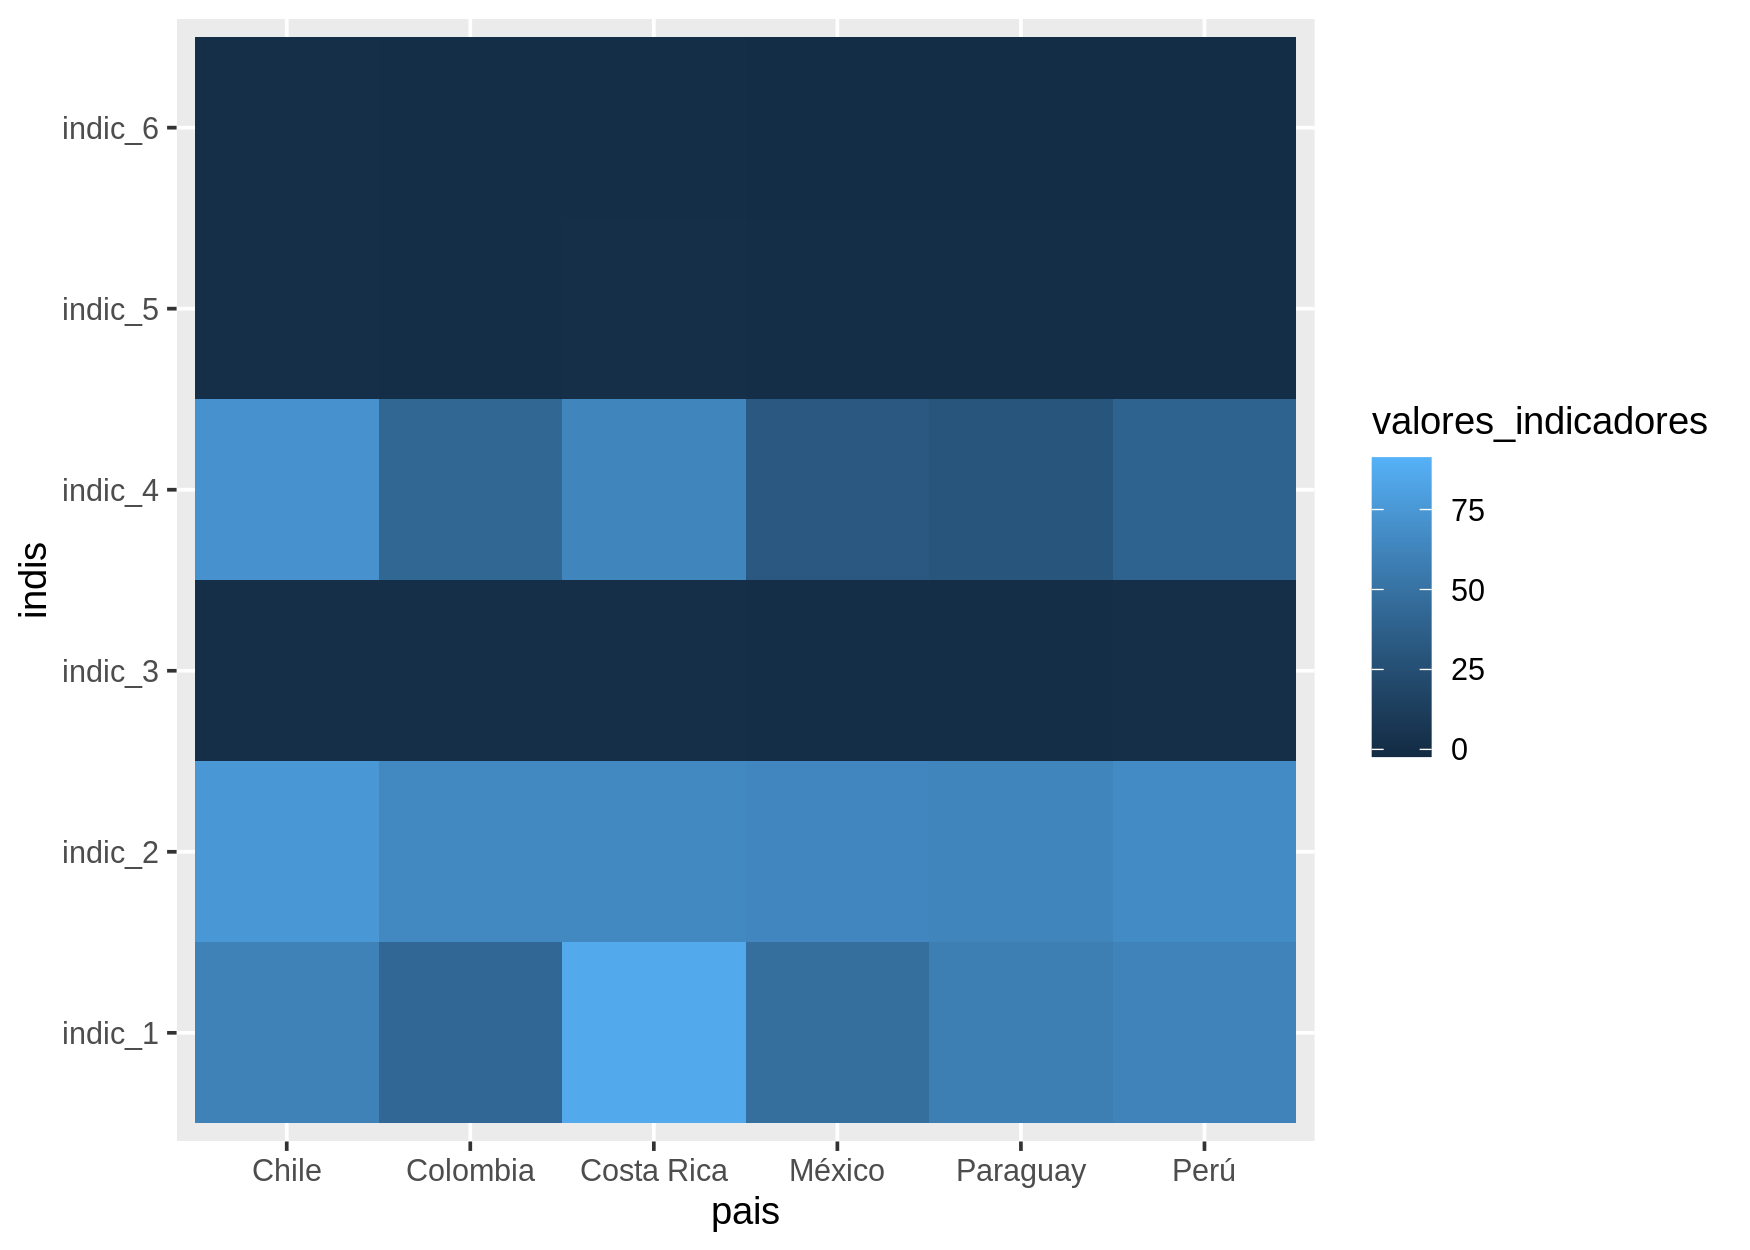

In [133]:
# Heatmap
ggplot(data=indi_long, aes(x =pais,y=indis, fill = valores_indicadores)) +
  geom_tile()

## Normalizar datos

Para hacer mejores comparaciones entre indicadores hay que normalizar los datos.

[Normalizar en R](https://www.digitalocean.com/community/tutorials/normalize-data-in-r)

In [175]:
# Creamos una replica de la base que ya tenemos
indi_escalados <- indicadores

In [176]:
# Seleccionamos las variables que escalaremos
var_normalize <- c('indic_1','indic_6','indic_2','indic_3','indic_4','indic_5')

In [177]:
# Reemplazamos las columnas con los valores ya escalados
indi_escalados[,var_normalize] <- scale(indi_escalados[,var_normalize])
head(indi_escalados)

pais,año,indic_1,indic_6,indic_2,indic_4,indic_3,indic_5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Chile,2010,-2.6882857,2.109136,1.948987,1.695122,0.01634319,1.450754
Chile,2011,-1.7280266,2.090714,1.991005,1.566109,0.01634319,1.389752
Chile,2012,NA,2.145981,2.180086,1.888643,0.01634319,1.410086
Chile,2013,0.5952813,2.109136,2.327149,1.888643,0.01634319,1.471088
Chile,2014,0.6181199,1.888067,2.264122,1.907995,0.33310392,1.369418
Chile,2015,0.7634565,1.666997,2.222104,1.824136,0.51852484,1.247414


In [178]:
# Volvemos a pasar la base a formato largo
indi_escalados_long <- pivot_longer(indi_escalados,cols = indic_1:indic_5, names_to = 'indis', values_to='valores_indicadores')

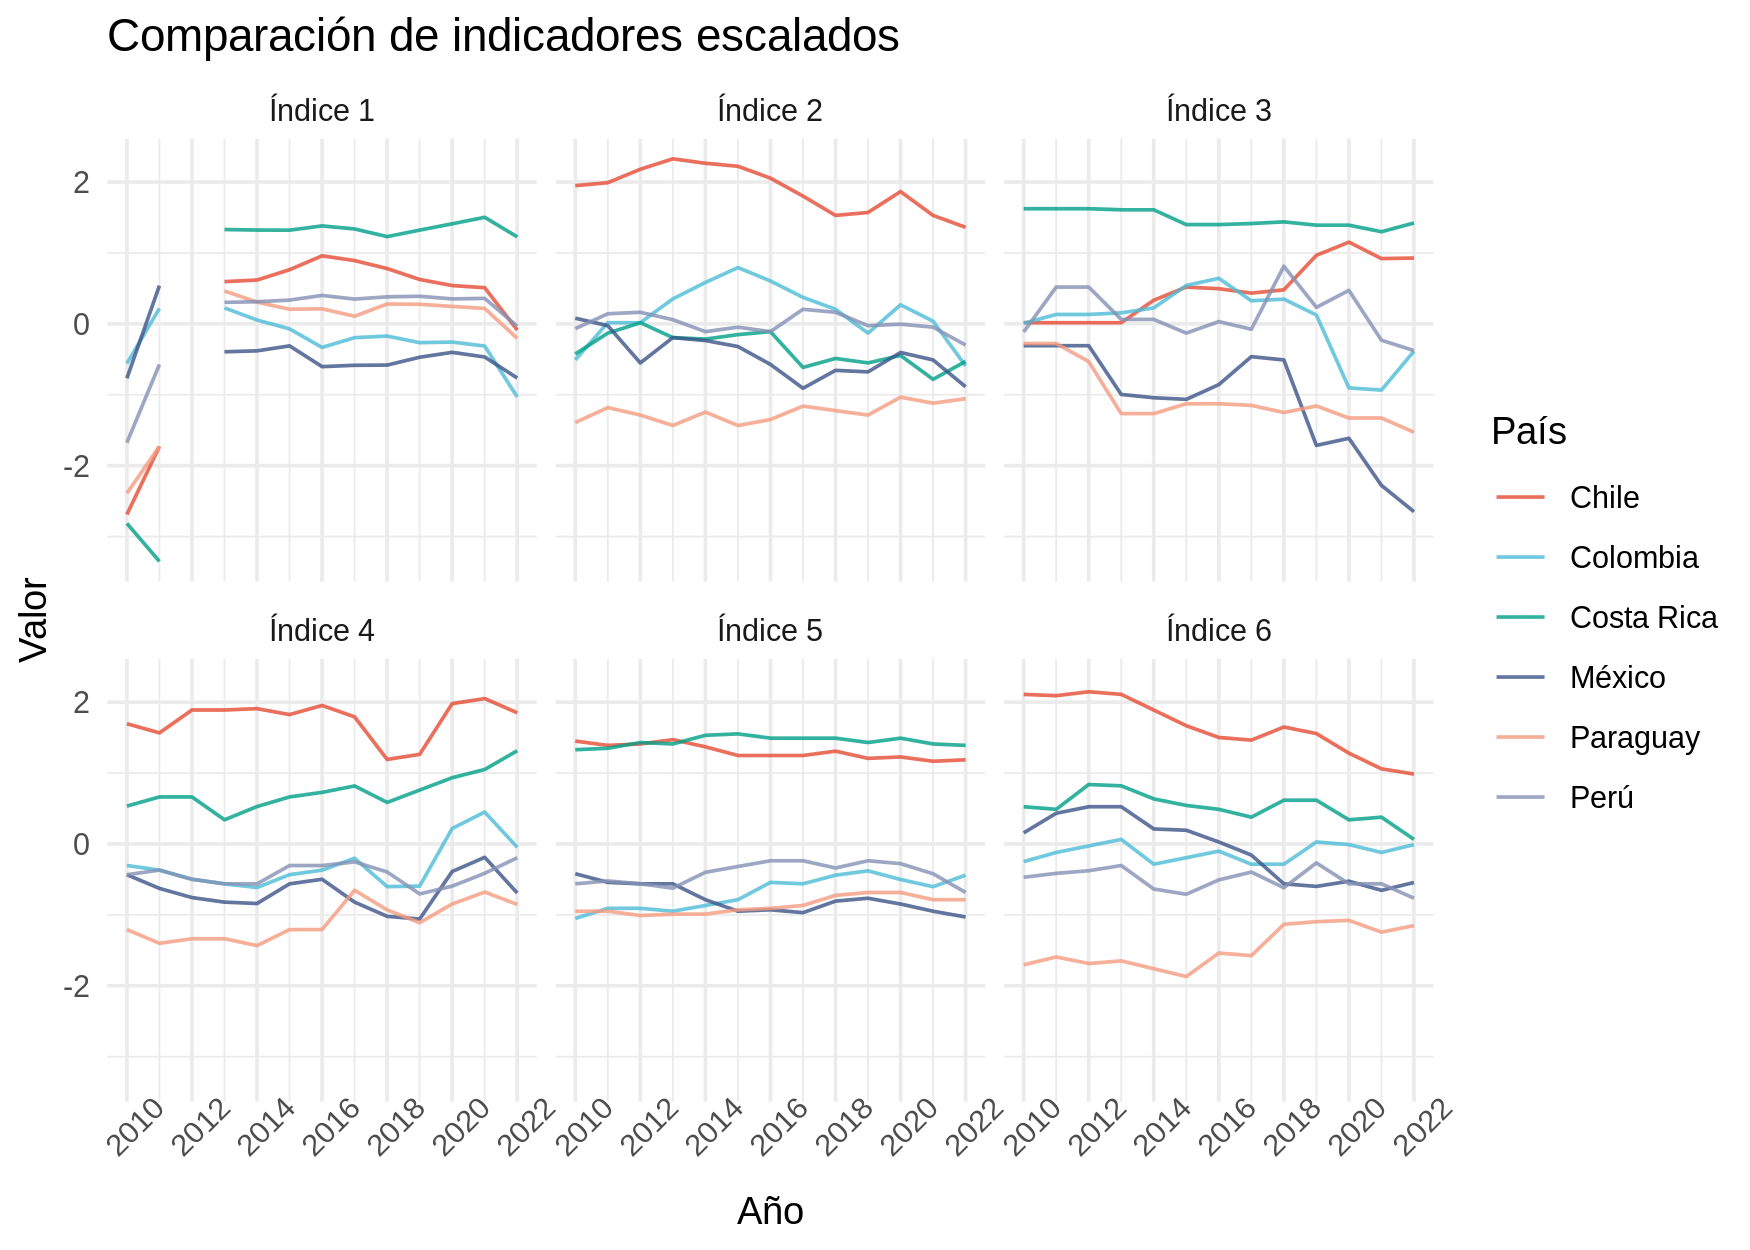

In [183]:
# Graficar todos los indicadores
ggplot(indi_escalados_long, aes(x = año, y = valores_indicadores, color = pais)) +
  theme_minimal() +
  geom_line(na.rm=TRUE, alpha=0.8) +
  facet_wrap(~indis, labeller = labeller(indis = c('indic_1'='Índice 1',
                                                    'indic_2'='Índice 2',
                                                    'indic_3'='Índice 3',
                                                    'indic_4'='Índice 4',
                                                    'indic_5'='Índice 5',
                                                    'indic_6'='Índice 6'))) + #Cambiamos título de cada plot
  scale_x_continuous(breaks = seq(2010,2022,2)) +
  theme(axis.text.x = element_text(angle = 45)) + # Ponemos los años en mejor ángulo
  scale_color_npg(name = 'País') +
  labs(x='Año', y='Valor', title = 'Comparación de indicadores escalados')